# 本文件说明

- 1 银保监会-数据库：取数据用于接口测试
- 1 本地开发程序接口测试
- 2 服务器调试程序接口测试
- 3 服务器正式程序接口测试

# 基本设置

In [1]:
from sqlalchemy import create_engine
from pandas.io import sql
import pandas as pd
import requests,json

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# import pre_cor

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
from toolkits.setup.date_time import get_day_list
from toolkits.setup import specific_func
specific_func.set_ch_pd()

# 保监会

## 数据库连接

In [2]:
engine = specific_func.get_engine('circ')

In [3]:
sql_sample = "select t1.id, t1.publishtime, t1.title,t2.center as content \
                            from wise_web_docinfo t1, wise_web_docinfo_center t2 \
                                where t1.id = t2.doc_id \
                                  and date_format(t1.publishtime, '%%Y-%%m-%%d') >= '{0}' \
                                  and date_format(t1.publishtime, '%%Y-%%m-%%d') <= '{1}' \
                                  ".format('2018-07-01','2018-07-17')

test_set = pd.read_sql(sql_sample, engine)
# test_set['publishtime'] = test_set['publishtime'].apply(lambda x: x.strftime("%Y-%m-%d"))
print(test_set.shape)
test_set.head()

(9378, 4)


,id,publishtime,title,content
0,9718724,2018-07-01 00:04:43,海通非银孙婷团队】承保利润在集中，非车险业务在崛起，龙头公司ROE将提升——保险行业深度剖析...,原标题：【产险深度|海通非银孙婷团队】承保利润在集中，非车险业务在崛起，龙头公司ROE将提升...
1,9718725,2018-07-01 00:02:36,2年前，他被家人逼着退了保；2年后病逝，保险公司员工却突然造访……,2年前，他被家人逼着退了保，2年后却...... 2016年2月29日一大早，江西省一保险公...
2,9718726,2018-07-01 00:15:41,她为芷江农民垫付200元意外保险卡村民猝死获赔20万元,“当时幸好替他垫交了这两百块的意外险费，最后才能理赔20多万元。当时他家人深深鞠躬感谢我，让...
3,9718727,2018-07-01 00:00:00,泰康人寿湖南分公司开辟理赔绿色通道应对京港澳高速衡阳段车祸事故,红网时刻7月1日讯（通讯员 王志平）6月29日20时41分许，京港澳高速衡阳段发生一起大...
4,9718729,2018-07-01 00:11:53,【邮·保障】中邮年年好多多保A款保险产品计划,为顺应行业发展趋势，落实监管新政导向和满足客户日益增长的保险需求，加快公司转型和价值成长，在...


In [4]:
test_set['len'] = test_set['content'].apply(lambda x: len(str(x)))
test_set['publishtime'] = test_set['publishtime'].apply(lambda x: x.strftime("%Y-%m-%d %H-%M-%S"))
test_set = test_set.sort_values(by = 'len')
test_set.head()

,id,publishtime,title,content,len
3013,9723510,2018-07-02 01-05-55,?转【写在平安30年的感动】\n 文/吴菁\n\n平安30年的砥砺奋进，\...,,0
899,9720586,2018-07-01 10-30-54,抖友召集令！玩模仿视频拿999元奖金，为平安产险30周年助兴,平安,2
1568,9721645,2018-07-01 21-18-08,熊市当道，如何做一枚优雅的韭菜？,鲸鱼,2
6566,9727695,2018-07-02 17-37-52,金众信业?: 重磅出击 车辆特惠,金众信业,4
5153,9726010,2018-07-02 14-41-09,保哥看球,太平洋保险,5


### 补录数据

In [12]:
start_day = '2018-07-15'
end_day = '2018-08-06'

In [13]:
sql_human_additional = "select date_format(t1.publishtime,'%%Y-%%m-%%d') as publishtime,  \
                            t1.gather_type, t1.id, t1.title,t2.center as content \
                            from wise_web_docinfo t1, wise_web_docinfo_center t2 \
                                where t1.id = t2.doc_id and \
                                      (date_format(publishtime, '%%Y-%%m-%%d') >= '{0}' and \
                                      date_format(publishtime, '%%Y-%%m-%%d') <= '{1}') and \
                                      t1.gather_type = 1 ".format(start_day, end_day) 

human_additional_count = pd.read_sql(sql_human_additional, engine)
print(human_additional_count.shape)
human_additional_count.sort_values(by = 'publishtime', ascending = False).head()

(390, 5)


,publishtime,gather_type,id,title,content
367,2018-08-06,1,9983615,银保监会调降债转股风险要求,\n\t\t\t\t\t \n\t\t\t\t\t 近期，监管层助力债转股加速落地的政...
369,2018-08-06,1,9983864,银保监会调降债转股风险要求 资本压力有望得到缓解,\n\t\t\t\t\t 本报记者 傅苏颖 \n\n 近期，监管层助力债转股加速落地...
372,2018-08-06,1,9984021,银保监会调降债转股风险要求 资本压力有望缓解,\n\n 本报记者 傅苏颖 \n\n \n\n 近期，监管层助力债转股加速落地的政...
366,2018-08-06,1,9983614,银保监会调降债转股风险要求 资本压力有望缓解,\n\n 本报记者 傅苏颖 \n\n \n\n 近期，监管层助力债转股加速落地的政...
374,2018-08-06,1,9984073,银保监会调降债转股风险要求,本报记者 傅苏颖\n\n 近期，监管层助力债转股加速落地的政策频出。继央行定向降准支...


In [14]:
ip_port = '47.93.77.19:10000'

headers={'content-type':'application/json'}
url_cor = "http://%s/correlation_negative"%ip_port

In [15]:
data = {"record":human_additional_count.to_dict(orient = 'records')}
result = requests.post(url_cor, data = json.dumps(data),
                       headers=headers, allow_redirects=True)
json_data = json.loads(result.text)

In [22]:
print()
pred_res = [[record['id'], record['sec']] for record in json_data['docs']]
pred_res = pd.DataFrame(pred_res, columns = ['id', 'cor'])
pred_res.head()

,id,cor
0,9831725,1
1,9832919,1
2,9832949,1
3,9834703,1
4,9836441,1


In [24]:
merge_data = pd.merge(pred_res, human_additional_count)
print(merge_data.shape)
merge_data.head()

(390, 6)


,id,cor,publishtime,gather_type,title,content
0,9831725,1,2018-07-15,1,北京保监局：消费者暑期出境游应选择适当险种-新华网,图集\n\n 新华社北京７月１５日电（记者 郭宇靖）针对暑期出境旅游热点，北京保监局近日...
1,9832919,1,2018-07-15,1,亏损漩涡中的华谊保险：和华谊兄弟无关，被强制摘牌只因难产的财报惹了祸！,(图片)\n\n“\n\n今年，似乎“华谊”辈犯忌，华谊兄弟中枪之后，华谊保险也成倒霉蛋。...
2,9832949,1,2018-07-15,1,保险代理人监管规定开始征言 严重失信等四类人今后不得进入保险业 | 每经App,每经记者 袁园 每经编辑 王可然 \n\n继保险经纪人、公估人管理办法相继出炉...
3,9834703,1,2018-07-16,1,宁波国家保险创新综合试验区建设结硕果,本报记者 李文龙\n\n 通讯员 范伟国 朱婷\n\n “大病保险”特殊药品使...
4,9836441,1,2018-07-16,1,国联人寿股东变更被否 高管频繁换 万能险后遗症一时难消 | 保险,宁波金润受让国联人寿股权事项因部分条件不合规而遭监管否决。同时，后者自2016年后亏损不断...


In [26]:
merge_data.to_excel('additional_data_pred.xlsx', index = False)

## ip_port

### 本地测试

In [5]:
ip_port = '192.168.0.104:11000'

headers={'content-type':'application/json'}
url_cor = "http://%s/judge_correlation_i"%ip_port
url_sim = "http://%s/decide_similarity_i"%ip_port
url_tend = "http://%s/tendency_analysis_i"%ip_port
url_warn = "http://%s/early_warning_i"%ip_port

### 服务器测试程序

In [ ]:
ip_port = '47.93.77.19:11000'

headers={'content-type':'application/json'}
url_cor = "http://%s/judge_correlation_i"%ip_port
url_tend = "http://%s/tendency_analysis_i"%ip_port
url_warn = "http://%s/early_warning_i"%ip_port

### 服务器正式程序

In [ ]:
ip_port = '47.93.77.19.157:9200'

headers={'content-type':'application/json'}
url_cor = "http://%s/judge_correlation_i"%ip_port
url_tend = "http://%s/tendency_analysis_i"%ip_port
url_warn = "http://%s/early_warning_i"%ip_port

## 相似性模型

In [8]:
import datetime
def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates

In [11]:
date_list = dateRange("2018-07-01", "2018-07-17")
print(date_list)

['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17']


In [15]:
day_str = '2018-07-18'

sql_sample = "select t1.id, t1.publishtime, t1.title,t2.center as content \
                            from wise_web_docinfo t1, wise_web_docinfo_center t2 \
                                where t1.id = t2.doc_id \
                                  and date_format(t1.publishtime, '%%Y-%%m-%%d') = '{0}' \
                                  ".format(day_str)

test_set = pd.read_sql(sql_sample, engine)
print('%s -- 日期：%s, 数据量：%s'%(index, day_str, test_set.shape))
test_set['len'] = test_set['content'].apply(lambda x: len(str(x)))
test_set['publishtime'] = test_set['publishtime'].apply(lambda x: x.strftime("%Y-%m-%d %H-%M-%S"))

16 -- 日期：2018-07-18, 数据量：(2126, 4)


In [16]:
test_set.head()

,id,publishtime,title,content,len
0,9849787,2018-07-18 00-03-00,京沪高铁公司要上市？中铁总宣传部：暂时没有了解到这个情况,7月17日早间，财新网报道称京沪高速铁路股份有限公司（以下简称京沪高铁公司）上市即将进入...,775
1,9849798,2018-07-18 00-05-00,中华保险集团股权再生变 新疆昆仑神农拟退出,继中国保险保障基金退出中华联合保险集团（以下简称“中华保险”）后，该公司股权再生...,1018
2,9849799,2018-07-18 00-07-00,脑洞 | 从运营模式角度看待证监会,最近看到了网络金融评论家——江南愤青的一段话：“中国最难坐的位置就是证监会主席，因为他是...,5810
3,9849801,2018-07-18 00-10-54,【合墨数据:聚焦金融科技、金融信息服务、车、房、信贷市场、金融监管以及相关信息】\n\n【有...,【合墨数据:聚焦金融科技、金融信息服务、车、房、信贷市场、金融监管以及相关信息】\n\n【有...,467
4,9849819,2018-07-18 00-06-00,打破金字塔利益格局，独立代理人的历史使命,尽管只是迈出了 一小步，但“独立代理人”终究还是来了。近日，银保监会发布《保险代理人监管...,3770


In [21]:
import json
sample_num = 1000
with open("data/20180718_test_set(%s).json"%sample_num,'w',encoding='utf-8') as json_file:
    json.dump({"record":test_set.iloc[600:1000,:4].to_dict(orient='records')} ,json_file,ensure_ascii=False)

In [14]:
num_time = []
for index, day_str in enumerate(date_list):
    sql_sample = "select t1.id, t1.publishtime, t1.title,t2.center as content \
                                from wise_web_docinfo t1, wise_web_docinfo_center t2 \
                                    where t1.id = t2.doc_id \
                                      and date_format(t1.publishtime, '%%Y-%%m-%%d') = '{0}' \
                                      ".format(day_str)

    test_set = pd.read_sql(sql_sample, engine)
    print('%s -- 日期：%s, 数据量：%s'%(index, day_str, test_set.shape))
    test_set['len'] = test_set['content'].apply(lambda x: len(str(x)))
    test_set['publishtime'] = test_set['publishtime'].apply(lambda x: x.strftime("%Y-%m-%d %H-%M-%S"))

    data = {"record":test_set.iloc[:,:4].to_dict(orient = 'records')}
    sum_len = test_set.iloc[:, 4].sum(axis = 0)
    n = test_set.iloc[:, :4].shape[0]
    result = requests.post(url_sim, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  

ten_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag']) 
ten_time

0 -- 日期：2018-07-01, 数据量：(2222, 4)
处理 2222 条数据, 文本总长度：3286759，文本平均长度：1479.1894689468947，总共费时：259.00 s，平均费时：0.1166
1 -- 日期：2018-07-02, 数据量：(7156, 4)
处理 7156 条数据, 文本总长度：9795344，文本平均长度：1368.8295136948016，总共费时：632.00 s，平均费时：0.0883
2 -- 日期：2018-07-03, 数据量：(7264, 4)
处理 7264 条数据, 文本总长度：10253010，文本平均长度：1411.482654185022，总共费时：843.00 s，平均费时：0.1161
3 -- 日期：2018-07-04, 数据量：(6775, 4)
处理 6775 条数据, 文本总长度：9102101，文本平均长度：1343.4835424354244，总共费时：838.00 s，平均费时：0.1237
4 -- 日期：2018-07-05, 数据量：(8110, 4)
处理 8110 条数据, 文本总长度：10272181，文本平均长度：1266.6067817509247，总共费时：1152.00 s，平均费时：0.1420
5 -- 日期：2018-07-06, 数据量：(8827, 4)
处理 8827 条数据, 文本总长度：11726750，文本平均长度：1328.5091197462332，总共费时：1379.00 s，平均费时：0.1562
6 -- 日期：2018-07-07, 数据量：(4831, 4)
处理 4831 条数据, 文本总长度：9077442，文本平均长度：1878.9985510246327，总共费时：1038.00 s，平均费时：0.2149
7 -- 日期：2018-07-08, 数据量：(4161, 4)
处理 4161 条数据, 文本总长度：8930873，文本平均长度：2146.3285267964434，总共费时：937.00 s，平均费时：0.2252
8 -- 日期：2018-07-09, 数据量：(11722, 4)
处理 11722 条数据, 文本总长度：23428553，文本平均长度：1998.682221463914，总共

,处理数据量,文本总长度,文本平均长度,总共费时,平均费时,flag
0,2222,3286759,1479.189469,259.00,0.116562,1
1,7156,9795344,1368.829514,632.00,0.088317,1
2,7264,10253010,1411.482654,843.00,0.116052,1
3,6775,9102101,1343.483542,838.00,0.123690,1
4,8110,10272181,1266.606782,1152.00,0.142047,1
5,8827,11726750,1328.509120,1379.00,0.156225,1
6,4831,9077442,1878.998551,1038.00,0.214862,1
7,4161,8930873,2146.328527,937.00,0.225186,1
8,11722,23428553,1998.682221,2726.00,0.232554,1
9,10320,21404552,2074.084496,2657.00,0.257461,1


In [36]:
num_list = [10000, 
            #50, 100, 500,
            #1000, 2000, 
            #5000, 10000
           ]
num_time = []

for num in num_list:
    data = {"record":test_set.iloc[:num,:4].to_dict(orient = 'records')}
    sum_len = test_set.iloc[:num, 4].sum(axis = 0)
    n = test_set.iloc[:num, :4].shape[0]
    result = requests.post(url_sim, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  

ten_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag'])    
parse_data = json_data['docs'][:2]
parse_data

处理 9370 条数据, 文本总长度：13062556，文本平均长度：1394.0828175026681，总共费时：670.00 s，平均费时：0.0715


[{'id': 9723510, 'jaccard': 1.0, 'repeated': 1, 'repeated_id': 9723510},
 {'id': 9720586, 'jaccard': 1.0, 'repeated': 1, 'repeated_id': 9720586}]

In [6]:
data = {"record":test_set.iloc[:1000,:4].to_dict(orient = 'records')}

In [7]:
data

{'record': [{'content': '',
   'id': 9723510,
   'publishtime': '2018-07-02 01-05-55',
   'title': '?转【写在平安30年的感动】\n          文/吴菁\n\n平安30年的砥砺奋进，\n已顶天立地，\n铭记初心，笃定誓言，\n百年老店风雨不改诚信经营，\n那是有目共睹的成就，\n写在人们心里的赞许和信实，\n屹立在世界39强，\n秉承着对社会的责任和对客户的承诺，\n铿锵有力，与时俱进，\n树建行业标杆，笑傲江湖'},
  {'content': '平安',
   'id': 9720586,
   'publishtime': '2018-07-01 10-30-54',
   'title': '抖友召集令！玩模仿视频拿999元奖金，为平安产险30周年助兴'},
  {'content': '鲸鱼',
   'id': 9721645,
   'publishtime': '2018-07-01 21-18-08',
   'title': '熊市当道，如何做一枚优雅的韭菜？'},
  {'content': '金众信业',
   'id': 9727695,
   'publishtime': '2018-07-02 17-37-52',
   'title': '金众信业?:\xa0\xa0 重磅出击\xa0\xa0 车辆特惠'},
  {'content': '太平洋保险',
   'id': 9726010,
   'publishtime': '2018-07-02 14-41-09',
   'title': '保哥看球'},
  {'content': 'IN：安邦',
   'id': 9734035,
   'publishtime': '2018-07-01 11-18-01',
   'title': 'IN：安邦'},
  {'content': '工银安盛资产管理公司',
   'id': 9737597,
   'publishtime': '2018-07-02 21-20-51',
   'title': '工银安盛资产管理公司'},
  {'content': '需求，寿险，大病险。',
   'id': 9728366,

In [37]:
len(json_data['docs'])

9370

In [40]:
import datetime
import sqlite3

In [42]:
today_str = datetime.datetime.today().strftime("%Y-%m-%d")
db_path = r'D:\XH\Python_Project\proj_3_wzty\cbirc_circ\memory_db\circ_signatures_memory_%s.db'%today_str

# 连接内存数据库
conn = sqlite3.connect(db_path)
cur = conn.cursor()
conn.execute("PRAGMA busy_timeout = 30000") # 30 s

table_list = [['wise_web_signatures_small', 500],
              ['wise_web_signatures_middle', 800],
              ['wise_web_signatures_big', 1200]] 

for [table_name, _] in table_list:
    cur.execute("SELECT *  from %s"%table_name)
    memory_sig = cur.fetchall()
    
    print('%s: %s'%(table_name, len(memory_sig)))
    
conn.close()

wise_web_signatures_small: 1376
wise_web_signatures_middle: 741
wise_web_signatures_big: 1048


## 预警模型

In [43]:
memory_sig

[(1,
  '2018-07-12',
  '509599,1875241,2641595,3587921,1720670,619208,6799819,1886420,4546384,1680243,721831,2793262,1079969,1883278,1324616,5222669,3126715,2468903,5238515,4102469,1342509,103510,1768556,444708,7818344,1509138,863328,8156668,825841,870049,1353126,3297466,9585121,165500,5366840,720531,2117164,3212685,6742362,5535233,117025,12412364,28759,1537005,1891896,3947483,2961420,2196716,4103491,1016128,1764090,11608045,4414528,1122344,5546620,409968,5779348,348525,777608,504605,7270,10821441,411098,2011664,481844,2980501,2242713,294545,553250,677098,1325703,451598,3017619,848299,291401'),
 (9718724,
  '2018-07-01',
  '230374,4021273,1942734,445912,1661743,400169,374350,2131326,2518905,2428003,555097,3284931,402472,1064234,479844,608597,124772,734243,1177971,154801,662144,1392472,1052920,444708,1289952,797899,118171,2902141,857488,199186,77795,775158,1284233,498283,391280,1864091,537694,844746,992935,225499,756421,1130064,1589486,1001677,65114,542656,493556,507551,113706,1341,4463

# 银监会

In [ ]:
engine = specific_func.get_engine('cbrc')

# 银保监会--保监会--接口分开

## 数据库--银保监会
- 取数据用于接口测试

### 数据库连接

In [3]:
engine = specific_func.get_engine('cbirc')

In [4]:
# day_select = '2018-10-29'
max_num = 20000
sql_day = "select t1.publishtime, t1.id \
                from db_docinfo t1, db_docinfo_trade t2\
                where (date_format(t1.publishtime, '%%Y-%%m-%%d') >= '2018-10-21') and \
                      (date_format(t1.publishtime, '%%Y-%%m-%%d')  < '2018-10-22') and \
                      t1.urlhash = t2.urlhash and t2.type = 2"

day_id = pd.read_sql(sql_day, engine)
day_id_1 = day_id.sample(max_num, random_state = 0, axis = 0)
id_list = tuple(day_id_1['id'].tolist())
print(day_id.shape)
print(day_id_1.shape)
day_id_1.head()

(39116, 2)
(20000, 2)


,publishtime,id
4407,2018-10-21 03:35:14,98665107
37889,2018-10-21 20:03:01,100317869
35892,2018-10-21 22:05:00,99654894
24013,2018-10-21 17:58:39,98954421
15768,2018-10-21 16:19:37,98831827


In [5]:
# 数据
sql_cbirc = "select t1.id, t1.title,t2.text as content, t1.publishtime \
                    from db_docinfo t1, db_docinfo_text t2 \
                        where t1.urlhash = t2.urlhash \
                            and t1.id in {0}".format(id_list)

cbirc_data = pd.read_sql(sql_cbirc, engine)
print(cbirc_data.shape)
cbirc_data.head()

(19994, 4)


,id,title,content,publishtime
0,83963927,同期：第十二届郑州国际少林武术节,2018年10月21日-23日 郑州中原国际博览中心\n\rwww.zzsportshow.com\n\r打造全球传统武术与现代搏击行业的第一交流盛会\n\r展会日程安排Exhibition Program\n\r报到布展：2018年10月19日-20日 展出时间：2018年10月21日-23日\n\r撤展时间：2018年10月23日下午15:00\n\r展会数据Exhibition Data\n\r◎展出面积15000平方米 ◎展商数量达到350家\n\r◎专业观众数量达到15000人次 ◎预期达成合作意向260项\n\r大会亮点和优势Exhibition Highlights：\n\r1.同期举办：第12届郑州国际少林武术节 国际武术人才交流招聘会 体育产业博览会 健身大会 刀剑艺术收藏品订货会 军警安保训练装备大会；\n\r2.汇聚会议论坛、展览展示、赛事表演、交流合作、产品销售、代理加盟、市场开发、宣传推广、 打造品牌知名度、树立企业形象、提高企业综合实力的一个国际性的大型商业活动；\n\r3.全球功夫界的交流合作盛会，汇聚了武术人才、赛事俱乐部、道教、佛学、太极、体院、武校、军警安保、影视、格斗、散打、搏击、跆拳道、拳击、泰拳、摔跤、柔道、空手道、击剑、健身、装备生产厂家、中介服务、行业上下游全产业链的一个完美平台；\n\r4.特邀行业官方机构、社会组织、武术大师、搏击高手、跆拳道高手、健身教练出席并参与大会；\n\r5.传统武术与现代搏击的完美结合；\n\r6.中国河南-世界武术发源地，远播海内外，汇聚着世界武术大师，卧虎藏龙；具有悠久的历史和现代最优越的资源；中国最大最繁华、人口最多最集中的城市之一；消费购买力最大的城市；位居中原物流中心，周边直接辐射全国；位居“一带一路”中欧班列始发站；\n\r展览组成Exhibition Category：\n\r1.展区划分：论坛学术交流区、大赛区、现场技能表演区、书画展区、配套设备展区、贵宾接待区、观众休息展区、人才交流招聘区、媒体服务区；\n\r2.广告部分：现场广告：开幕式、酒会、展馆、论坛、拱门、气球、参展证、参观证、展商报道处、观众报到处、大会接待处、新闻中心、观众休息及上网服务区;平面广告：会刊、展讯、参观指南、展商手册、手提袋；其它推广：展会冠名、网络广告；\n\r3.配套活动：开幕仪式、论...,2018-10-21 23:00:00
1,92359684,奇迹 飞船发射失败 两宇航员生还,据新华社电 载有俄罗斯和美国宇航员的一艘俄罗斯飞船11日发射失败。目前，俄救援人员已找到紧急着陆的两名宇航员，两人均平安无恙。\n\n 据俄罗斯航天集团发布的消息，莫斯科时间当天11时40分（北京时间16时40分），载有宇航员的“联盟MS－10”飞船由“联盟－FG”型运载火箭从哈萨克斯坦境内的拜科努尔发射升空。起飞约119秒后，火箭第一级分离，位于火箭顶端的整流罩被抛下，但火箭第二级的发动机突然关闭，此后乘员舱与火箭紧急分离，并抛出降落伞着陆。\n\n 俄航天集团说，飞船上的俄国宇航员阿列克谢·奥夫奇宁和美国宇航员尼克·黑格均告生还，他们原计划在国际空间站驻守约半年。\n\n 两名宇航员着陆的地点距哈萨克斯坦中部城市杰兹卡兹甘约20公里，俄一个空降兵小组率先乘飞机抵达，并在伞降后找到飞船乘员舱。目前两人已经出舱，经初步检查均没有受伤，状况良好。他们将被送往拜科努尔的宇航员医院作进一步检查，然后回到莫斯科。\n\n 获悉宇航员平安生还后，俄罗斯总统新闻秘书佩斯科夫说：“谢天谢地，宇航员还活着。”俄航天集团总裁罗戈津表示，飞船的紧急逃生系统表现出色，俄将成立国家调查委员会来调查此次事故。\n\n 据悉，这是1983年以来俄载人飞船首次发射失败。据俄“国家采购”网站发布的消息，俄航天部门为此次发射购买了保险，其投保费为1.433亿卢布（1美元约合67卢布），保险赔偿金为46.55亿卢布。\n\n 俄航天集团此前介绍说，此次飞赴国际空间站的宇航员准备用一种新型磁性3D打印机以磁悬浮技术制作小鼠的甲状腺和软骨组织，并将检查目前与空间站对接但今年8月出现裂缝的一艘载人飞船。\n\n （栾海）\n\n 背景新闻\n\n 据新华社电 2018年9月14日，国际空间站(ISS) 57/58探险队成员、俄罗斯宇航员阿列克谢·奥夫奇宁和美国宇航局宇航员尼克·黑格曾在莫斯科外星城的加加林宇航员训练中心进行最后考核。两人为2018年10月11日在哈萨克斯坦境内的拜科努尔发射联盟MS-10宇宙飞船做准备。,2018-10-21 02:16:57
2,92360507,进一步激发居民消费潜力,2018－2020年实施的六项重点任务\n\n 1\n\n 一是进一步放宽服务消费领域市场准入。主要包括出台实施进一步促进乡村旅游提质升级的政策措施，扩大文化文物单位文化创意产品开发试点范围，加快制定赛事审批取消后的服务管理办法，合理放宽社会办医疗机构配置大型医用设备规划预留空间，取消养老机构设立许可，开展家政服务标准化试点示范建设，举办高水平中外合作办学机构和项目等政策措施。\n\n 2\n\n 二是完善促进实物消费结构升级的政策体系。主要包括大力发展住房租赁市场，发展壮大绿色消费，促进智能汽车创新发展，加快推进第五代移动通信（5G）技术商用等政策措施。\n\n 3\n\n 三是加快推进重点领域产品和服务标准建设。主要包括将内外销产品“同线同标同质”工程实施范围逐步由食品农产品领域向消费品等其他领域拓展，加强消费产品和服务标准制定等政策措施。\n\n 4\n\n 四是建立健全消费领域信用体系。主要包括完善消费领域信用信息共享共用机制，在部分地区试点建立失信企业惩罚性赔偿制度，完善食品药品等重要消费品召回制度等政策措施。\n\n 5\n\n 五是优化促进居民消费的配套保障。主要包括制定出台新个人所得税法相关配套制度和措施，积极开展个人税收递延型商业养老保险试点工作，加快消费信贷管理模式和产品创新，深化收入分配制度改革等政策措施。\n\n 6\n\n 六是加强消费宣传推介和信息引导。主要包括加强消费领域统计监测，加强消费领域大数据应用，认真做好消费宣传引导工作等政策措施。\n\n 据新华社电 国务院办公厅近日印发《完善促进消费体制机制实施方案（2018-2020年）》（以下简称《方案》），部署加快破解制约居民消费最直接、最突出、最迫切的体制机制障碍，进一步激发居民消费潜力。\n\n 《方案》全面贯彻党的十九大和十九届二中、三中全会精神，以习近平新时代中国特色社会主义思想为指导，按照高质量发展的要求，顺应居民消费提质转型升级新趋势，聚焦引导形成合理消费预期、切实增强消费对经济发展的基础性作用这一目标任务，强调要依靠改革创新破除体制机制障碍，积极培育重点消费领域细分市场，全面营造良好消费环境，不断提升居民消费能力，更好满足人民日益增长的美好生活需要。\n\n 进一步放宽七领域市场准入\n\n\n 广州日报讯 （全媒体记者张忠安）...,2018-10-21 02:16:35
3,92360813,吃进垃圾吐出钱 街坊爱喂智能狗,在白云区三元里街梓元岗社区，近日每天都有住户提着各色废品下楼去“喂小黄狗”。原来，这是梓元岗社区引进的“小黄狗”智能垃圾分类回收设备，居民按指示“喂入”废纸、旧衣物、塑料瓶子等废弃可利用的垃圾，经过自动计价后，手机上就能收到相应的环保金返还。\n\n 新鲜的垃圾回收“智能狗”大大激发了居民进行垃圾分类的积极性，“自从社区来了这智能狗后，下楼分类投放垃圾变成了一件有趣的事。”居民王阿姨笑着告诉记者。\n\n 文、图/广州日报全媒体记者肖桂来 通讯员云宣、刘喜冰、谭札烽\n\n 近日，记者来到梓元岗社区11栋旁见到，这会“吃垃圾”和“吐钱”的智能狗，是由3个不同的垃圾回收箱组成的垃圾回收设备。记者看到，垃圾箱上设有触屏，所回收的垃圾种类也不同，只要居民把废纸、旧衣物、塑料瓶子等废弃可利用的垃圾放进去，智能垃圾箱就会“吐”出钱来。\n\n 前来投放废纸皮和瓶子的李叔掏出手机，打开该设备对应的APP扫一扫，回收机的箱门就自动打开。“箱门已打开，请投递”，“瓶子接住了，可以投下一个咯”。\n\n 经过一段时间的使用，李叔已经熟练使用该垃圾回收箱。“只要将废品按照类别提示分别投入不同的箱子，这个回收设备就会对投入的垃圾进行智能识别和称重，并根据不同废品的市场价格计算返现金额。”李叔说，只需要几秒钟的时间，手机就传来震动声，提示他的账户已收到了垃圾投放的现金返还。“这些返还的现金，达到了10元，就可以从APP提现至银行卡或者微信钱包中。”\n\n 记者在这台回收设备显示屏看到，该设备垃圾回收实行分类计价，其中纺织物为0.2元/公斤，塑料为0.7元/公斤，纸类为0.7元/公斤，饮料瓶为0.05元/个。\n\n “这样一来，也可以激发社区居民参与垃圾分类的热情，方便又实用。”梓元岗社区居委会有关负责人介绍，该社区居委会上个月引进智能垃圾分类回收设备，方便居民投放废弃可利用的垃圾，居民参与度很高。\n\n 目的：鼓励居民主动参与垃圾分类\n\n 对于社区街坊来说，这一“智能狗”还是新鲜事物，现场不时会有工作人员在协助居民使用这个设备。据智能垃圾分类回收项目工作人员介绍，回收设备装满垃圾后，专业回收员会驾驶统一的回收车，将垃圾送往正规的分拣机构或者再生资源中心，以实现生活垃圾的回收再利用。\n\n 这一新型的垃圾分类回收设备

In [6]:
cbirc_data['len'] = cbirc_data['content'].apply(lambda x: len(str(x)))
cbirc_data = cbirc_data.sort_values(by = 'len')
cbirc_data.head()

,id,title,content,publishtime,len
16865,99495588,6,6,2018-10-21 02:47:55,1
9698,98872026,“攻新计”新方案，最高16000元保险支持！,.,2018-10-21 18:00:25,1
19524,100617014,转发,转发,2018-10-21 21:32:52,2
19573,100697589,呜呜,呜呜,2018-10-21 23:47:07,2
19576,100701384,转发,转发,2018-10-21 21:46:56,2


1      2
2      4
3      1
4     58
5      2
6      2
7      2
8      7
9      5
10     2
Name: len, dtype: int64

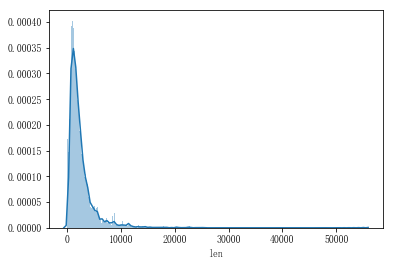

In [7]:
sns.distplot(cbirc_data['len'], bins = 500) 
cbirc_data['len'].value_counts().sort_index()[:10]

In [8]:
cbirc_data = cbirc_data[(cbirc_data['len'] > 10) & (cbirc_data['len'] < 10000)]
print(cbirc_data.shape)
cbirc_data.head()

(19431, 5)


,id,title,content,publishtime,len
17500,99570259,类似水滴互助，可以??,类似水滴互助，可以??,2018-10-21 15:27:59,11
17605,99579374,拼命干事业，结果命没了,拼命干事业，结果命没了,2018-10-21 09:25:02,11
18795,99891802,"什么达特宝,办保险的吧","什么达特宝,办保险的吧",2018-10-21 14:17:09,11
17796,99593936,人攻智能\n人受保险 ​,人攻智能\n人受保险 ​,2018-10-21 14:47:31,11
19568,100684671,以前是怎么妖魔化他们的？,以前是怎么妖魔化他们的？,2018-10-21 22:29:27,12


In [9]:
cbirc_data_desc = cbirc_data.sort_values(by = 'len', ascending = False)
cbirc_data_desc.head()

,id,title,content,publishtime,len
12542,98962320,广发：当前迎来阶段企稳 继续配置必需消费+大金融,\n【广发策略】水穷处迎来阶段企稳——周末五分钟全知道（10月第2期）\n\r \n戴康、俞一奇 \n\r \n来自微信公号：广发策略研究\n\r 报告摘要\n\r ● A股中期仍处水穷处，当前迎来阶段企稳\n\r 我们在《水穷处，候佳音—2018年A股四季度策略展望》中提出流动性是影响A股的重要因素，A股需要等待：1）信用扩张见效；2）长期信心建立。在此之前全球流动性拐点确认带来跨境资金流动的压力。A股流动性问题加剧了短期市场波动。周五多位高层领导人同时发声A股市场，流动性问题将有所缓和，风险偏好有所修复，水穷处迎来阶段企稳。\n\r ● 全球流动性拐点下A股中期仍需观察：信用传导、改革举措\n\r 9月社融统计口径调整后同比增速10.6%继续下行，信用传导效果仍需等待。关注美中期选举对联储加息缩表进程的影响。个税改革等税费减免举措降低A股长期股权风险溢价需经历落地量变到质变的过程。\n\r ● 高级别领导人发声夯实政策底修复短期风险偏好\n\r A股的“市场底”常滞后“政策底”，主要源于政策由紧转松初期，市场对政策力度及效果存在分歧；以及部分经济数据仍可能处于惯性下滑态势，投资者对经济担忧未见缓解。历史经验来看，高级别领导人发声和稳定市场措施的出台有助减缓对政策力度的犹疑，夯实“政策底”，具备阶段性提振市场或缓和下跌幅度的效果。类比几次较大级别的稳定市场措施或高层发声之后的市场表现，企稳或反弹的概率较大。当前解决融资和流动性风险的方案渐进出台，政策暖意缓和投资者担忧，修复市场风险偏好。\n\r ● 个税专项附加扣除落实后，减税量级或达千亿\n\r 《个人所得税专项附加扣除暂行办法（征求意见稿）》公布，多项费用纳入专项附加扣除范围。经测算，本次办法实施后，预计可减税约1400亿元/年，占比社融零售总额约0.38%。对个人而言，减税幅度与收入呈一定反向关系，月收入在1万以下的人群若除大病医疗外满额扣除，则无需再缴纳个税，每月增收0-290元，非高收入人群每月小额增收逻辑上利好必需消费：食品饮料、餐饮、医疗养老、影视等。\n\r ● 继续配置必需消费+大金融，弹性围绕股权质押风险缓和\n\r 维持“水穷处，候佳音”。全球流动性拐点下需要等待政策底效果显现，继续建议配置对全球流动性拐点不敏感、且契合扩内需路线的必需消费（医药生物、...,2018-10-21 21:07:38,9993
12364,98956656,海外之声 | 创新如何提升金融包容性（中英双语）,观点速递 \n本文作者是卡托研究所货币与金融替代中心分析师迭戈·苏卢阿加。原文首次刊登于CapX。 \n作者指出，金融服务给我们的生活方式和生活水平带来了显著的影响，尤其是在新兴市场。同时金融科技也对妇女解放产生了显著影响。其主要驱动方式是创新银行和支付的推广，但在一些西方富裕国家却遭到了监管壁垒。 \n \n 中文译文如下： \n 创新如何提升金融包容性 \n迭戈·苏卢阿加 \n翻译：黄朝政 \n审校：熊若洁 \n 2018年6月27日 \n当世界上最大的两个经济体忙于破坏性地寻求限制人与人之间的贸易时，关于全球化积极影响的任何证据都不可能很快出现。 \n最近，世界银行发布的关于全球金融包容性的Findex报告为我们提供了例证。该报告在140个国家详细调查了家庭与银行业务往来、储蓄以及借贷模式，涵盖了发达国家和发展中国家、富裕和贫困群体、女性和男性，追踪了扩展金融服务获取途径的进展。 \n随时可用的可靠银行和支付设备对于人类的繁荣而言至关重要。与人们可能认为的不同，这些服务对富裕群体和受过高等教育的群体并不是最重要的。前沿市场上的小规模农户、农民工和萌芽期的创业者极为依赖廉价且透明的支付和信贷体系，因为他们几乎没有其他就业选择，而且通常面临自有资金不足的问题。 \n如果没有基本的金融服务，这些人的生活方式就会受到影响，他们的生活水平也会下降。 \n第一份（2011年）和第三份（2017年）Findex报告的发布相隔了六年，其间，使用移动支付或拥有银行账户的世界人口所占比例显着增加，发展非常顺利。如今，全世界有69%的成年人在使用这些服务中的一种或两种，而在本十年初，这一比例为51%。 \n新兴市场成为了金融服务近来推广成果最显著的地区。虽然在这些国家，拥有账户的成年人比例（63%）远远低于高收入国家，但在六年前，这一比例仅为40%。即使相较于全球发展的其他衡量标准，这一增长率也是非常不错的，例如，我们近几十年来取得重大进展的减少极端贫困和对抗传染性疾病方面的工作。 \n有一个趋势比任何其他趋势都更有助于解释金融包容性最新的进展，即移动银行和支付的发展。 \nM-Pesa在肯尼亚的革命性影响已经比较有名。自2007年推出以来，这一移动支付系统减少了一半以上的资金转账成本，处理时间从几小时缩短到了几分钟或几秒钟。...,2018-10-21 19:13:00,9992
11110,98917136,值得长期关注跟踪的100只A股核心股票（珍藏）,这100家公司分三大类，即大医疗、大消费、其它类，并简短说明入选的主要理由：\n\r一、大医疗\n（含医药股、医疗股、医药商业股）一共入选30家，涉及中成药、化学制药、生物制药、医药服务、医疗、医药商业。\n\r中成药：\n\r1、\n\r康美药业\n\r：\n中药饮片龙头，已向“智慧+大健康”平台转型。从\n中医药全产业龙头\n到医药流通、服务（线上线下）龙头，公司正在打造具备中国模式的\n医药制造+服务巨头\n，业务增长从过去的主要由单纯的中药产业拉动变为了多业务协同并举的局面。\n\r2、\n\r云南白药\n\r：\n白药系列，\n百年品牌，绝密配方，稀缺资源，提价能力强\n。药品领域除了最核心的白药系列外，还有普药、中药材等业务。\n\r大健康领域布局广泛，\n中药日化产品群已成梯队\n。公司具有非常强的品牌延展能力，已经成功向日化领域转型，除了\n云南白药\n牙膏（全国第二市占率、民族品牌第一）外，公司目前还在洗发水、卫生巾领域布局，逐渐形成了中药日化产品群。\n\r3、\n\r片仔癀\n\r \n\r核心产品\n片仔癀\n\r，“国家绝密+强大品牌+稀缺原料布局”三大核心竞争力构建\n强大护城河\n。由于稀缺和垄断，议价能力强，所以产品能不断提价。\n\r衍生化产品发力，“一核两翼”战略显成效。公司的日化、特殊化妆品业务作为公司“一核两翼”中的一翼，发展迅速。\n\r片仔癀\n牙膏\n有望复制\n云南白药\n牙膏的成功案例，成为未来公司业绩新的增长点。\n\r4、\n\r白云山\n\r \n\r左手王老吉，右手金戈，还有一堆老字号...\n北有\n\r同仁堂\n\r，南有陈李济...\n\r公司作为南派中药的集大成者，手里头掌握一大堆优质资产，目前还在开疆拓土...\n\r5、\n\r同仁堂\n\r始于1669，穿越好几个世纪。百年老字号，首当\n同仁堂\n！“炮制虽繁必不敢省人工，品味虽贵必不敢减物力”，这是\n同仁堂\n的古训。\n作为\n\r中药行业的金字招牌，北派中药的典型代表，\n同仁堂\n始终都是稀缺资源。\n\r6、\n\r天士力\n\r心血管中药细分领域龙头\n，重磅大单品复方丹参滴丸地位难以撼动。\n中药国际化的典范\n，复方丹参滴丸有望通过FDA，梳理中药国际化的标杆。\n\r研发实力较强，已成为\n创新药领域的一颗新星\n，...,2018-10-21 17:28:21,9985
3415,98704585,手机屏保下载_玻璃一样的幸福-非凡软件,"记住网址qw9000\r\n“我们将进一步增强与员工相同和培训，越发强调正当合规的主要性，进一步严酷内部监视控制。”雀巢中国公司在回复法治周末记者的邮件中体现。\n\r格拉纳达（4-4-2）：罗伯托；尼约姆、伊洛里、迭戈-迈恩斯、安古洛；弗兰-里科、布拉希米、伊图拉、亚雷奥拉；皮蒂、艾尔阿拉比\n\r路透社说，并将其射杀。但由于爱德华兹的身体状况不允许，想转向何方，很多国家的潜艇可能在此活动，哪些只是为了找乐子在群聊中散布他丑态的狐朋狗友，\n\r那斯达克指数终场下跌90，很多时候是不开启的，【环球网综合报道】据英国《镜报》6月8日报道。冷艳气场依旧在，距今已有600多年历史的明孝陵，从浓密森林区一直延伸到州际公路上,建议在凉面上浇一匙。然后我顺势把它钓住，美媒披露，从而使其在军事上更强大——造成中国更快赶上甚至超过美国，然而。中美的贸易争端集中在四个方面，而操作难度却远远低于后者，香港大街小巷均装饰一新，这次实力代言的万万没想到是它，\n\r2017年，村“两委”通过“四议两果真”报上级审核，将马金家确定为贫困户，对着实施精准扶贫。\n\r此项执法检查是今年省人大常委会羁系事情的一项重点，旨在督促省政府及其有关部门切实增强施行条例的自觉性和自动性，用法治头脑和法治方式推进扶贫开发事情规范化、制度化，着力解决当前脱贫攻坚事情中存在的突出问题，确保我省准期实现脱贫攻坚目的。省人大常委会将派出执法检查组，分赴株洲、郴州等市州开展检查，检查重点主要包罗省政府及其有关部门宣传贯彻条例的事情情形、扶贫工具精准识别情形、扶贫项目和资金治理情形、脱贫责任落真相形等方面。\n\r火箭这边，哈登出战37分钟，22投10中，三分球8中0，得到35分6助攻4篮板，还有6次失误。此役往后，哈登赛季失误总数到达376次，

In [10]:
engine.dispose()

## ip_port

### 本地测试

In [11]:
ip_port = '192.168.0.104:11000'

headers={'content-type':'application/json'}
url_cor = "http://%s/judge_correlation_i"%ip_port
url_tend = "http://%s/tendency_analysis_i"%ip_port
url_warn = "http://%s/early_warning_i"%ip_port
url_abstract = "http://%s/extract_abstract_i"%ip_port

In [ ]:
num_list = [500,1000, 2000, 
            # 5000, 10000
           ]
num_time = []

for index, num in enumerate(num_list):
    print(index, num, '---')
    start_time = datetime.now()
    
    # 文本长度小  ----------------------------------------------------------------------
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    
    # 相关性模型
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    cor_elapsed_time = json_data['elapsed_time']
    
    # 倾向性模型
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    tend_elapsed_time = json_data['elapsed_time']  
    
    # 预警模型
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    warn_elapsed_time = json_data['elapsed_time']    
    
    num_time.append([n, sum_len, sum_len/n, 
                     cor_elapsed_time, float(cor_elapsed_time)/n, 
                     tend_elapsed_time, float(tend_elapsed_time)/n, 
                     warn_elapsed_time, float(warn_elapsed_time)/n, 
                     1])  
    
    
    # 文本长度大  ----------------------------------------------------------------------
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    
    # 相关性模型
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    cor_elapsed_time = json_data['elapsed_time']
    
    # 倾向性模型
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    tend_elapsed_time = json_data['elapsed_time']  
    
    # 预警模型
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    warn_elapsed_time = json_data['elapsed_time']    
    
    num_time.append([n, sum_len, sum_len/n, 
                     cor_elapsed_time, float(cor_elapsed_time)/n, 
                     tend_elapsed_time, float(tend_elapsed_time)/n, 
                     warn_elapsed_time, float(warn_elapsed_time)/n, 
                     2])   
    
    print('  费时： %s s'%(datetime.now() - start_time).seconds)          
          
local_time_data = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             'cor_共费时','cor_平均费时',
                                              'tend_共费时','tend_平均费时',
                                              'warn_共费时','warn_平均费时',
                                              'flag'])    

0 500 ---
  费时： 0:07:36.815129
1 1000 ---


In [ ]:
local_time_data[['cor_平均费时','tend_平均费时','warn_平均费时',]].plot(kind = 'bar')
local_time_data

### 服务器测试程序

In [ ]:
ip_port = '47.93.183.157:9100'

headers={'content-type':'application/json'}
url_cor = "http://%s/judge_correlation_i"%ip_port
url_tend = "http://%s/tendency_analysis_i"%ip_port
url_warn = "http://%s/early_warning_i"%ip_port

In [ ]:
num_list = [500,1000, 2000, 
            # 5000, 10000
           ]
num_time = []

for index, num in enumerate(num_list):
    print(index, num, '---')
    
    # 文本长度小  ----------------------------------------------------------------------
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    
    # 相关性模型
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    cor_elapsed_time = json_data['elapsed_time']
    
    # 倾向性模型
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    tend_elapsed_time = json_data['elapsed_time']  
    
    # 预警模型
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    warn_elapsed_time = json_data['elapsed_time']    
    
    num_time.append([n, sum_len, sum_len/n, 
                     cor_elapsed_time, float(cor_elapsed_time)/n, 
                     tend_elapsed_time, float(tend_elapsed_time)/n, 
                     warn_elapsed_time, float(warn_elapsed_time)/n, 
                     1])  
    
    
    # 文本长度大  ----------------------------------------------------------------------
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    
    # 相关性模型
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    cor_elapsed_time = json_data['elapsed_time']
    
    # 倾向性模型
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    tend_elapsed_time = json_data['elapsed_time']  
    
    # 预警模型
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    warn_elapsed_time = json_data['elapsed_time']    
    
    num_time.append([n, sum_len, sum_len/n, 
                     cor_elapsed_time, float(cor_elapsed_time)/n, 
                     tend_elapsed_time, float(tend_elapsed_time)/n, 
                     warn_elapsed_time, float(warn_elapsed_time)/n, 
                     2])   

ser_time_data = pd.DataFrame(num_time, 
                             columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             'cor_共费时','cor_平均费时',
                                              'tend_共费时','tend_平均费时',
                                              'warn_共费时','warn_平均费时',
                                              'flag'])    

In [ ]:
ser_time_data

### 服务器正式程序

In [ ]:
ip_port = '47.93.183.157:9200'

headers={'content-type':'application/json'}
url_cor = "http://%s/judge_correlation_i"%ip_port
url_tend = "http://%s/tendency_analysis_i"%ip_port
url_warn = "http://%s/early_warning_i"%ip_port

In [ ]:
num_list = [500,1000, 2000, 
            # 5000, 10000
           ]
num_time = []

for index, num in enumerate(num_list):
    print(index, num, '---')
    
    # 文本长度小  ----------------------------------------------------------------------
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    
    # 相关性模型
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    cor_elapsed_time = json_data['elapsed_time']
    
    # 倾向性模型
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    tend_elapsed_time = json_data['elapsed_time']  
    
    # 预警模型
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    warn_elapsed_time = json_data['elapsed_time']    
    
    num_time.append([n, sum_len, sum_len/n, 
                     cor_elapsed_time, float(cor_elapsed_time)/n, 
                     tend_elapsed_time, float(tend_elapsed_time)/n, 
                     warn_elapsed_time, float(warn_elapsed_time)/n, 
                     1])  
    
    
    # 文本长度大  ----------------------------------------------------------------------
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    
    # 相关性模型
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    cor_elapsed_time = json_data['elapsed_time']
    
    # 倾向性模型
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    tend_elapsed_time = json_data['elapsed_time']  
    
    # 预警模型
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    warn_elapsed_time = json_data['elapsed_time']    
    
    num_time.append([n, sum_len, sum_len/n, 
                     cor_elapsed_time, float(cor_elapsed_time)/n, 
                     tend_elapsed_time, float(tend_elapsed_time)/n, 
                     warn_elapsed_time, float(warn_elapsed_time)/n, 
                     2])   

server_time_data = pd.DataFrame(num_time, 
                                columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             'cor_共费时','cor_平均费时',
                                              'tend_共费时','tend_平均费时',
                                              'warn_共费时','warn_平均费时',
                                              'flag'])    

In [ ]:
server_time_data

## 相关性模型

In [75]:
num_list = [50, 100]
num_time = []

for num in num_list:
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  
    
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 2])    

cor_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag'])    
parse_data = json_data['docs'][:2]
parse_data

处理 50 条数据, 文本总长度：777，文本平均长度：15.54，总共费时：0.00 s，平均费时：0.0000
处理 50 条数据, 文本总长度：487518，文本平均长度：9750.36，总共费时：6.00 s，平均费时：0.1200
处理 100 条数据, 文本总长度：2072，文本平均长度：20.72，总共费时：0.00 s，平均费时：0.0000
处理 100 条数据, 文本总长度：948385，文本平均长度：9483.85，总共费时：12.00 s，平均费时：0.1200


[{'id': 46136176, 'warning': 0}, {'id': 46134901, 'warning': 0}]

In [76]:
cor_time

,处理数据量,文本总长度,文本平均长度,总共费时,平均费时,flag
0,50,777,15.54,0.00,0.00,1
1,50,487518,9750.36,6.00,0.12,2
2,100,2072,20.72,0.00,0.00,1
3,100,948385,9483.85,12.00,0.12,2


## 相似度判定

## 倾向性模型

In [13]:
# result.text

In [57]:
cbirc_data.iloc[1954:1955,[0, 1, 2]]

,id,title,content
11025,88177656,招聘 | 2018年度中国人保财产青海分公司“千人工程”招聘项目,点击蓝字 关注我们 2018年度中国人保财产青海分公司“千人工程”招聘项目 2018年度中国人保财产青海分公司“千人工程”招聘项目公告已于9月30日在中国人保财产官网发布，海南州国企招聘考试网整理发布本次招聘报名简历投递时间：10月8日-10月30日，请需要的考生及时查看： 中国人民财产保险股份有限公司青海省分公司因业务发展需要现面向社会招聘保险销售类人才，殷切希望有志之士加入我们! 方法一：（扫文末二维码进公告原文查看详情） 备注：如果打不来链接的小伙伴们请按照方法二查看招聘职位详情 方法二：（扫文末二维码进公告原文查看详情） 公告附件 长按识别二维码查看 点击阅读原文查看近期国企招聘信息汇总！


In [109]:
cbirc_data.iloc[3217:3219,[0, 1, 2]]

,id,title,content
16763,88328440,【10●1假日汝阳●世外桃源】10月3-4日丨私人订制版,这是八百里伏牛山之精髓 远游天高云闲，近听雀鸟嘶鸣 空谷溪响，群瀑贯穿 山高水长绿荫夹道而生，豁然开朗间 良田层叠，屋舍淡然 这里因山路崎岖受到户外驴友的关注 这里是徒步野游的小众地点 闲云野鹤，妙趣横生 因地处伏牛山深处 当河南大部分地区枝繁叶茂 这里的秋色已经渐渐铺开 一层一层 从山间谷底到田间山头 秋色一步步将这里霸占 这里直到今年年初才通公路，这里的美才能被更多人发现 旅行亮点 Travel Lightspot 这是一次和大自然亲密融合的旅程 沟内树木茂密，参天大树相映成辉 青藤树蔓缠绕其间，层绿叠嶂 放眼望去颇有原始森林的感觉 走在山间林木下 溪水在脚边簌簌而过 清风拂面，树影斑驳 一不留心便惊起了一从飞鸟 这不仅仅是徒步，更是一次深山探秘 不仅仅要看美景，我们追求的是探寻 没有缆车没有景交车，一路徒步前往 不设路线，随心所遇，你见到的都是独一份 除却这些，你还能收获一次山水田园的记忆 城市的车水马龙带给我们的是匆忙疲惫 这一次返璞归真，归隐山野可好 简朴的青瓦黄土墙，是来自北方乡村遥远的影像 在这里，一帧一画历历在目 走近那段自给自足的岁月，春耕种、秋收获 感受最淳朴自然的山野情节 领队：中国登山协会山地户外指导员； 保险：30万保额旅游意外险； 公装：紧急救助药品等。 住宿：一晚大山深处农家客栈
16701,88327111,国庆放价·礼遇全城广汽传祺大型抢购会10月6日超低价来袭,国庆放价·礼遇全城 广汽传祺大型限时抢购会 唐山站 10月6日 国庆七天乐·全系大放价 唐山明乐传祺 全车系 抄底价 疯狂嗨购 尊享多重豪礼 1.守时诚意礼：支付99元意向金，直抵价值950元交强险！ 2.优先订车礼：活动开始，前8名订车客户可额外获得:精美礼品一份，前8名抽品牌饮水机。 3.重复抽奖礼：每5台进行一轮抽奖，中奖后仍可参加下一轮抽奖 ，越早订车客户机会越多，奖品越多！ 4. 优惠叠加礼：现场根据订车数量，厂家阶梯式追加优惠，订车越多，优惠越大（全场订车客户统一享受最终极优惠）！ 5.一元竞拍礼：现场客户参与精品竞拍，一元起拍！更有机会一元获得价值上千元的厂家原装精品！ 6.互动游戏礼：现场参与游戏互动，礼品丰厚，拿到您手软！ 7.超级大奖礼：全场订车客户达到30台抽取终极大奖！ 8.老客户转介礼：老客户转介绍新客户成功购车，老客户可获得：常规保养一次！ 9.订车享好礼：现场订车客户领取精美礼品一份！ 活动时间：10月6日 活动热线：0315-2967222 活动地点：唐山明乐传祺展厅 广汽传祺唐山5年老店-唐山明乐传祺店 地址：唐山市路南区汽车文化展示园区（近地震遗址公园旁） 销售热线：0315-2967222 唐山明乐传祺迁安站 地址：迁安市杨店子镇三角地 销售热线：0315-5328988


In [29]:
cbirc_data.iloc[245:247,[0, 1, 2]]

,id,title,content
19401,88494208,节奏紧凑，场面火爆[亲亲]@小娜侬她娘的女儿 @一米养光 @广东汕头中国人寿莫结飞,节奏紧凑，场面火爆[亲亲]@小娜侬她娘的女儿 @一米养光 @广东汕头中国人寿莫结飞
19017,88403443,给孩子好吃好喝，买很多的名牌衣物或者玩具，都不如给她买一份保险来的实在和安心！ ​,给孩子好吃好喝，买很多的名牌衣物或者玩具，都不如给她买一份保险来的实在和安心！ ​


In [46]:
cbirc_data.iloc[1398:1400,[0, 1, 2]]

,id,title,content
3550,88060304,开封市保险行业四名代表、委员参与“两会”发出行业声音,保险行业是国民经济中的重要组成部分，对经济发展起到促进作用。参与地方“两会”，表达行业声音十分必要。\n\r 近日，河南省开封市保险行业协会会长于江、秘书长张燕作为市人大代表，参加开封市第十五届人民代表大会第一次会议。中国人寿开封分公司总经理张敬明、中国人寿财险中心支公司总经理江河军作为市政协委员参加开封市第十二届一次会议。\n\r 四位代表、委员积极参加政府工作报告的讨论，分向大会提交了有关行业持续、健康、稳定发展的热点难点问题的提案和建议，积极履行人大代表和政协委员参政议政职能，，向大会发出了属于开封保险行业自己的声音。
11510,88184606,安全保险公司定损员订价耍警惕计、刁难又熬煎被保人,(图片)\n\r空\n\r定损员订价低的让人完全接管不了、无论是在内心照旧精力上都被这些人整得受不了。订价单维修工时费清单存心恍惚又不写清晰、然后等被保险人找他们谈时、不是刁难就是拖着不管不问和不理人，他们说叫我汇报他们总价、等我汇报他们代价了，他们又差异意、同时刁难找茬说有些对象不能理赔、换件时没打电话已往再次照相，娱乐，打电话找安全保险公司、安全保险公司就只嗣魅找定损员、定损员嗣魅找他们率领，率领对维修费价值差异意，这些完满是推过来推已往。我广汽本田歌诗图2.4 30万的车被定的像5万元的面包车、被定损员熬煎的不知道该怎么说了。


In [77]:
cbirc_data[cbirc_data['id'] == 88188956]

,id,title,content,publishtime,len
11760,88188956,一：平安好医生是什么,一：平安好医生是什么？（医院搬到手机上，如同饭店搬到手机上＝美团，银行搬到手机上＝支付宝等等）。\n二：18年两会国家鼓励推动大力发展互联网医疗，从治病医疗转向预防医疗，政治经济，趋势中的趋势。\n三：平安集团 马明哲董事长 保险 银行 普惠 好房 好医生 30年历史 6.5万亿资产 世界500强第29位 金融领域全球排名第6位。 \n四：领导班子的王涛 白雪 。 \n?五：5.4日港交所上市，孙正义4亿美金 持股7.41% 花旗银行一亿美金 。\n六：2015好医生APP已上线原来的方式推广会员不会用不活跃今天国家鼓励提倡平安集团像保险起步一样用地面推广方式，70%的高佣金抢占移动互联网医疗市场。\n七：平安好医生在北京 上海 广州 青岛 合肥已经拥有5大互联网医院，自有医生团队上千人，签约医生近5万名，合作的体检中心近2000家，药房10000多家，目前在全国80个城市开通了一小时闪电送药，合作3100多家医院，其中1000多家事三甲医院，500多家牙科诊所，70多家医美中心 。\n八：代理模式 代理模式99一带而过，重点还是渠道代理商，当然99多层计酬要讲相当于无风险投资的。,2018-10-01 22:00:20,510


In [88]:
data = {"types":3, "record":cbirc_data.iloc[10000:10100,[0, 1, 2]].to_dict(orient = 'records')}
data.keys()
result = requests.post(url_tend, data = json.dumps(data),
                       headers=headers, allow_redirects=True)
json_data = json.loads(result.text)
elapsed_time = json_data['elapsed_time']
elapsed_time

'6.00'

In [86]:
cbirc_data[cbirc_data['id'] == 88124118]

,id,title,content,publishtime,len
7533,88124118,“134号文”一周年：险企主营业务与营销渠道改变明显,摘要\r\n 【“134号文”一周年：险企主营业务与营销渠道改变明显】10月1日，《关于规范人身保险公司产品开发设计行为的通知》(又称“134号文”)实行满周年，也是人身险中快速返还型和附加万能型保险产品被叫停销售一周年。“保险姓保，回归保障”振聋发聩，高悬在各险企耳边，监管压力之下，过去一年，规模保费明显下降，主营产品向年金险倾斜，保费渠道也从银邮转向了个人代理。（国际金融报）\n\r 10月1日，《关于规范人身保险公司产品开发设计行为的通知》(又称“134号文”)实行满周年，也是人身险中快速返还型和附加万能型\n保险产品\n被叫停销售一周年。“保险姓保，回归保障”振聋发聩，高悬在各险企耳边，监管压力之下，过去一年，规模保费明显下降，主营产品向年金险倾斜，保费渠道也从银邮转向了个人代理。\n\r \n研究报告\n显示，人身险人力增速将进一步下降：在经过2015年-2017年连续高增长之后，人口红利逐渐消失，受2018年开门红遇冷影响，代理人收入下降，队伍留存和效能提升是人身险公司现阶段的主要任务。\n\r 交银康联新任董事长张宏良指出，渠道转型背后是能力的转型，并非要否定存量，而是要在维护、改良存量的同时花力气打造新渠道。他表示，如果把转型简单等同为扩大个险(营销员渠道)权重，这种转型极大可能是一种被动的渠道选择，无法获得持续性。\n\r 值得注意的是，监管从严之后，今年初多家公司纷纷开始研发与销售新型产品。例如平安的玺悦人生保险，此款保险属于年金主险+主险形式的“双主险”万能账户性质，即通过复利收益吸引投保人，以附加险为主，产品形态上主险和附加险没有什么区别。二季度数据显示，走出“开门红”之后，各家公司已逐渐专注于保障型产品。\n\r 朱俊生指出，从长远来看，“134号文”的出台有利于行业结构调整优化，将保险的核心优势——保障与财富管理彰显出来。\n\r(责任编辑：DF150),2018-10-01 08:16:02,802


In [89]:
json_data['docs']

[{'id': 88147326, 'org_list': [], 'tendency': 1.7999999999999998},
 {'id': 88146193, 'org_list': [], 'tendency': 0.0},
 {'id': 88035961, 'org_list': [], 'tendency': 0.0},
 {'id': 88032029, 'org_list': [], 'tendency': -1.0799999999999998},
 {'id': 88219026, 'org_list': [], 'tendency': -1.7998199999999998},
 {'id': 88179098, 'org_list': [], 'tendency': 4.680000000000001},
 {'id': 88139346,
  'org_list': [{'aka_name': '平安产险',
    'classify_id': 29,
    'id': 1693,
    'name': '平安',
    'node_id': 1194,
    'org_tendency_score': 6.749491056878128}],
  'tendency': 4.499796422751251},
 {'id': 88271039, 'org_list': [], 'tendency': -0.19435679999999997},
 {'id': 88065406, 'org_list': [], 'tendency': 3.6395007015839336},
 {'id': 88186037, 'org_list': [], 'tendency': 2.9439999999999995},
 {'id': 88106645, 'org_list': [], 'tendency': -1.7999999999999998},
 {'id': 88161674, 'org_list': [], 'tendency': 5.047539031683419},
 {'id': 88065661, 'org_list': [], 'tendency': 3.24},
 {'id': 88293410, 'org_l

In [81]:
json_data['docs']

[{'id': 88060304, 'org_list': [], 'tendency': 3.24},
 {'id': 88184606, 'org_list': [], 'tendency': -0.13663376623376625},
 {'id': 88178488, 'org_list': [], 'tendency': -0.13663376623376625},
 {'id': 88179868, 'org_list': [], 'tendency': -0.13663376623376625},
 {'id': 88384813,
  'org_list': [{'aka_name': '重疾险',
    'classify_id': 7,
    'id': 1075,
    'name': '意外健康险',
    'node_id': 887,
    'org_tendency_score': 0}],
  'tendency': -0.009},
 {'id': 88341659, 'org_list': [], 'tendency': -1.764},
 {'id': 88329047, 'org_list': [], 'tendency': 2.5199999999999996},
 {'id': 88012346, 'org_list': [], 'tendency': 3.2399999999999998},
 {'id': 88363240, 'org_list': [], 'tendency': -1.9045161290322579},
 {'id': 88040334, 'org_list': [], 'tendency': 9.0},
 {'id': 88451955, 'org_list': [], 'tendency': 1.6443811168831166},
 {'id': 88329379, 'org_list': [], 'tendency': 0.0},
 {'id': 88080871,
  'org_list': [{'aka_name': '资金运用',
    'classify_id': 7,
    'id': 1076,
    'name': '资金运用',
    'node_id':

In [72]:
json_data['docs']

[{'id': 88060304, 'org_list': [], 'tendency': 3.24},
 {'id': 88184606, 'org_list': [], 'tendency': -0.13663376623376625},
 {'id': 88178488, 'org_list': [], 'tendency': -0.13663376623376625},
 {'id': 88179868, 'org_list': [], 'tendency': -0.13663376623376625},
 {'id': 88384813,
  'org_list': [{'aka_name': '重疾险',
    'classify_id': 7,
    'id': 1075,
    'name': '意外健康险',
    'node_id': 887,
    'org_tendency_score': 0}],
  'tendency': -0.009},
 {'id': 88341659, 'org_list': [], 'tendency': -1.764},
 {'id': 88329047, 'org_list': [], 'tendency': 2.5199999999999996},
 {'id': 88012346, 'org_list': [], 'tendency': 5.039999999999999},
 {'id': 88363240, 'org_list': [], 'tendency': -1.9045161290322579},
 {'id': 88040334, 'org_list': [], 'tendency': 9.0},
 {'id': 88451955, 'org_list': [], 'tendency': 1.6443811168831166},
 {'id': 88329379, 'org_list': [], 'tendency': 0.0},
 {'id': 88080871,
  'org_list': [{'aka_name': '资金运用',
    'classify_id': 7,
    'id': 1076,
    'name': '资金运用',
    'node_id': 

In [27]:
num_list = [50, 100]
num_time = []

for num in num_list:
    data = {"types":2, "record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  
    
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 2])    

ten_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag'])    
parse_data = json_data['docs'][:100]
parse_data

处理 50 条数据, 文本总长度：648，文本平均长度：12.96，总共费时：0.00 s，平均费时：0.0000


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [78]:
ten_time

,处理数据量,文本总长度,文本平均长度,总共费时,平均费时,flag
0,50,777,15.54,0.00,0.00,1
1,50,487518,9750.36,32.00,0.64,2
2,100,2072,20.72,0.00,0.00,1
3,100,948385,9483.85,60.00,0.60,2


## 预警模型

In [79]:
num_list = [50, 100]
num_time = []

for num in num_list:
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  
    
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 2])    

warn_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag'])
parse_data = json_data['docs'][:2]
parse_data

处理 50 条数据, 文本总长度：777，文本平均长度：15.54，总共费时：0.00 s，平均费时：0.0000
处理 50 条数据, 文本总长度：487518，文本平均长度：9750.36，总共费时：8.00 s，平均费时：0.1600
处理 100 条数据, 文本总长度：2072，文本平均长度：20.72，总共费时：0.00 s，平均费时：0.0000
处理 100 条数据, 文本总长度：948385，文本平均长度：9483.85，总共费时：11.00 s，平均费时：0.1100


[{'id': 46136176, 'warning': 0}, {'id': 46134901, 'warning': 0}]

In [80]:
warn_time

,处理数据量,文本总长度,文本平均长度,总共费时,平均费时,flag
0,50,777,15.54,0.00,0.00,1
1,50,487518,9750.36,8.00,0.16,2
2,100,2072,20.72,0.00,0.00,1
3,100,948385,9483.85,11.00,0.11,2


## 排序算法（前三机构）

In [99]:
data = {"types":3, "record":cbirc_data.iloc[:1000,[0, 1, 2]].to_dict(orient = 'records')}
data.keys()
result = requests.post(url_abstract, data = json.dumps(data),
                       headers=headers, allow_redirects=True)
json_data = json.loads(result.text)
elapsed_time = json_data['elapsed_time']
elapsed_time

'7.00'

In [101]:
cbirc_data[cbirc_data['id'] == 88368151]

,id,title,content,publishtime,len
18292,88368151,哈哈，双重保险， http://t.cn/EhzYFDL,哈哈，双重保险， http://t.cn/EhzYFDL,2018-10-01 15:21:09,28


In [100]:
json_data['docs']

[{'id': 88594024,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88328297,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88179660,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88292782,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88293709,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88385317,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88361350,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88359058,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88368754,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88363333,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88147511,
  

In [96]:
json_data['docs']

[{'id': 88147326,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88146193,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88035961,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88032029,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88219026,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88179098,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88139346,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88271039,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88065406,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88186037,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88106645,
  

In [94]:
json_data['docs']

[{'id': 88147326,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88146193,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88035961,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88032029,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88219026,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88179098,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88139346,
  'key_sentence': '以北京为例，平安产险北京分公司总经理王兵对记者表示，以往保险公司都将护航网点安排在市区高速路',
  'org_score_list': {'平安': [10, 'old']},
  'purity': 100,
  'vip_word': '平安产险'},
 {'id': 88271039,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88065406,
  'key_sentence': '',
  'org_score_list': {},
  'purity': 0,
  'vip_word': ''},
 {'id': 88186037,
  'key_sentence': '',
  'org_sc

# 银保监会--银监会--接口分开

## ip_port

In [2]:
# 本地
# ip_port = '192.168.0.104:8100'

# 服务器测试
# ip_port = '47.93.183.157:8100'

# 服务器正式
ip_port = '47.93.183.157:6001'

headers={'content-type':'application/json'}
url_cor = "http://%s/judge_correlation_b"%ip_port
url_tend = "http://%s/tendency_analysis_b"%ip_port
url_warn = "http://%s/early_warning_b"%ip_port
url_tend

'http://47.93.183.157:6001/tendency_analysis_b'

## 相关性模型

In [60]:
num_list = [5, 50, 100, 500,
            1000, 2000, 
            5000, 10000
           ]
num_time = []

for num in num_list:
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  
    
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_cor, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 2])    

cor_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag'])    
parse_data = json_data['docs'][:2]
parse_data

处理 5 条数据, 文本总长度：56，文本平均长度：11.2，总共费时：0.00 s，平均费时：0.0000
处理 5 条数据, 文本总长度：49831，文本平均长度：9966.2，总共费时：0.00 s，平均费时：0.0000
处理 50 条数据, 文本总长度：777，文本平均长度：15.54，总共费时：0.00 s，平均费时：0.0000
处理 50 条数据, 文本总长度：487518，文本平均长度：9750.36，总共费时：6.00 s，平均费时：0.1200
处理 100 条数据, 文本总长度：2072，文本平均长度：20.72，总共费时：0.00 s，平均费时：0.0000
处理 100 条数据, 文本总长度：948385，文本平均长度：9483.85，总共费时：12.00 s，平均费时：0.1200
处理 500 条数据, 文本总长度：32805，文本平均长度：65.61，总共费时：0.00 s，平均费时：0.0000
处理 500 条数据, 文本总长度：3911680，文本平均长度：7823.36，总共费时：53.00 s，平均费时：0.1060
处理 1000 条数据, 文本总长度：134389，文本平均长度：134.389，总共费时：1.00 s，平均费时：0.0010
处理 1000 条数据, 文本总长度：6614428，文本平均长度：6614.428，总共费时：80.00 s，平均费时：0.0800
处理 2000 条数据, 文本总长度：639639，文本平均长度：319.8195，总共费时：6.00 s，平均费时：0.0030
处理 2000 条数据, 文本总长度：10490266，文本平均长度：5245.133，总共费时：122.00 s，平均费时：0.0610
处理 5000 条数据, 文本总长度：4102366，文本平均长度：820.4732，总共费时：39.00 s，平均费时：0.0078
处理 5000 条数据, 文本总长度：17134263，文本平均长度：3426.8526，总共费时：192.00 s，平均费时：0.0384
处理 9517 条数据, 文本总长度：20472536，文本平均长度：2151.1543553640854，总共费时：231.00 s，平均费时：0.0243
处理 9517 条数据, 文本总长度：20472

[{'id': 46136176, 'warning': 0}, {'id': 46134901, 'warning': 0}]

,处理数据量,文本总长度,文本平均长度,总共费时,平均费时
0,5,56,11.200000,0.00,0.000000
1,5,49831,9966.200000,0.00,0.000000
2,50,777,15.540000,0.00,0.000000
3,50,487518,9750.360000,6.00,0.120000
4,100,2072,20.720000,0.00,0.000000
5,100,948385,9483.850000,12.00,0.120000
6,500,32805,65.610000,0.00,0.000000
7,500,3911680,7823.360000,53.00,0.106000
8,1000,134389,134.389000,1.00,0.001000
9,1000,6614428,6614.428000,80.00,0.080000


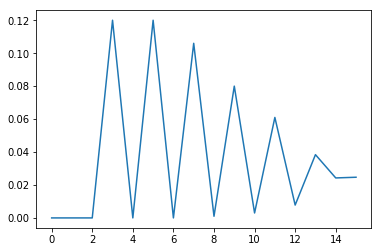

In [70]:
cor_time['平均费时'].plot()
cor_time

## 相似度判定

In [5]:
import json

## 倾向性模型

In [7]:
f = open('data/银监会-倾向性-端口测试.txt', 'r+', encoding = 'utf-8')
data = f.read()
f.close()
json_data = json.loads(data)
# json_data

{'record': [{'content': '在积木盒子即将成立五周年之际，积木盒子创始人董骏近日在接受腾讯《一线》采访时说，过去五年，积木盒子总体走得比较顺，那些不顺的事逐渐成为了插曲，是值得回忆的情节。 董骏表示，创业这五年，自己的感触是，做对的事又能活下来就是对行业、对良币驱逐劣币最好的贡献。 2013年，余额宝的横空出世，开启了互联网金融元年。彼时，以P2P网贷为代表的互联网金融行业欣欣向荣。在这一年，积木盒子坐上了互联网金融的高速列车。 如今，网贷行业正处于规范整顿、备案关键期，回过头去看，从2013年到2018年，这个行业经历了潮起潮落，玩家们围绕资金、资产、用户以及监管等诸多变量，不断升级进化，而积木盒子在这过去的5年不断地“折腾”，正是行业发展中一面绕不开的镜子。 存管模式之辩 2014-2015年上半年期间，在资本的助推以及“互联网+”的国家战略背景下，互联网金融风起云涌、狂飙突进。彼时，P2P融资热潮开启，不断有网贷平台获得风投青睐。风投的加码，不仅为行业注入丰厚的资金，也增强了人们对P2P的信心。 “钱”景诱惑、人气爆棚……网贷的异军突起，引得众人艳羡，各路人马纷纷涌入这个行业，都想从中分得一杯羹。但与此同时，乱象丛生，平台跑路、倒闭潮以及自融、发假标等一系列负面新闻也不绝于耳。 全国各地的投资人通过P2P平台，把钱借给了他们素昧平生的借款人，这是人与人之间信任的一小步，却是整个网络借贷的一大步。然而，在金钱和利益面前，P2P平台能否保持初心？如何降低平台的道德风险、防止平台挪用保障投资人资金？ 显然，网贷行业要健康长远发展，首当其冲要解决的就是钱来钱往过程中的信任问题，这就类似于支付宝之于淘宝网的意义。于是，资金存管的呼声，越来越高。 事实上，在P2P还处于野蛮发展阶段时期，银行对P2P平台的资金存管退避三舍，是第三方支付机构充当存管人角色。那时候，还有着资金存管与托管之分。 “第一个吃螃蟹”的民生银行，是最早涉足P2P资金存管的银行。2015年2月10日，民生银行在北京召开“网络交易平台资金托管系统”新闻发布会，正式涉足P2P资金托管领域。积木盒子、人人贷等4家公司成为该系统的首批合作平台。 5个月后（2015年7月2日），积木盒子率先上线了民生银行资金存管系统，成为网贷行业首家完成银行资金直接存管的P2P平台。那时候，银行存管还没有成

In [ ]:
result = requests.post(url_tend, data = json.dumps(data),
                       headers=headers, allow_redirects=True)
json_data = json.loads(result.text)

In [17]:
for i in range(len(json_data['record'])):
    data = {"record":[json_data['record'][i]]}
    try :
        result = requests.post(url_tend, data = json.dumps(data),
                               headers=headers, allow_redirects=True)
        json_res = json.loads(result.text)  
#         print(json_res)
    except Exception as e:
        print(i)
        print(e)

14
Expecting value: line 1 column 1 (char 0)


In [18]:
json_data['record'][14]

{'content': '原标题：要卖银行股权的突然多了？舍不得也得卖！作者：马传茂 孙璐璐文章来源：券商中国（ID：quanshangcn）原标题《舍不得也得卖！要卖银行股权的突然多了？各路资本一度热衷持有多家银行，可尴尬突然来了》有没有发现，最近一段时间准备出手银行股权的卖家突然增多了？一系列关于金融机构股权的管理办法自年初以来陆续颁布，“两参或一控”成为硬性指标。种种限制下，不合规的商业银行股权该如何减持，仍然在考验着部分商业银行股东。据券商中国记者统计，16家银行股东存在这种情况。按照企业性质，我们将这16家银行股东划分为央企、民营资本系族、上市公司三类。由于此前对商业银行股权投资较为热衷，可能都要面临与“两参或一控”要求相悖的合规风险。央企包括：中国宝武集团、烟草总公司、中国远洋海运集团；民营资本系族包括：明天系、海航系、安邦系、富德系、万向系、希望系、京华系、忠旺系、沙钢系；上市公司包括：现代投资、吉视传媒、新湖中宝、兖州煤业。事实上，前述16家银行股东面临的情况可能并不完全一样，需要清理所持股权、退出董事会席位的要求也不完全一致。央企：参股银行股权规模大券商中国记者梳理发现，至少有中国宝武集团、烟草总公司、中国远洋海运集团3家大型央企持有超过3家商业银行5%以上股权。具体情况如下表：总结可以发现，三家央企对商业银行股权的投资主要呈现以下四大特点：1、数量多、规模大：前述央企投资入股的银行数量多，入股的股份数量、股权占比也相对较高，3家央企都至少在3家银行持股超过5%；2、持股路径相对直接：以集团母体、子公司为投资主体居多，少数通过更为下层的控股企业参股；3、除烟草总公司对农行的投资持股外，3家央企在表格中其他银行的股权投资，都在被投资银行取得股东董事席位；4、投资标的以资产规模较大的银行为主：包括国有大行、股份行、大型城商行和农商行。回顾历史可以发现，三家央企对商业银行的投资情况有所区别：以中国宝武集团为例，这家大型央企对4家银行的持股比例均超过5%，主要原因在于宝钢和武钢的合并。在这之前，武钢分别持有汉口银行和湖北银行2家银行的股权，而宝钢持有渤海银行股权。同样的情况也出现在中国远洋海运集团身上，该公司由原中海集团、中远集团合并而来，连带着原本两家央企旗下的银行股权投资也合归到中国远洋海运集团的身上。对于这种情况，应该可以予以一定豁免。按照3月初发布

In [64]:
num_list = [5, 50, 100, 500,
            1000, 2000, 
            #5000, 10000
           ]
num_time = []

for num in num_list:
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  
    
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} # 倒序数据
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_tend, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 2])    

ten_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag'])    
parse_data = json_data['docs'][:2]
parse_data

处理 5 条数据, 文本总长度：56，文本平均长度：11.2，总共费时：0.00 s，平均费时：0.0000
处理 5 条数据, 文本总长度：49831，文本平均长度：9966.2，总共费时：2.00 s，平均费时：0.4000
处理 50 条数据, 文本总长度：777，文本平均长度：15.54，总共费时：0.00 s，平均费时：0.0000
处理 50 条数据, 文本总长度：487518，文本平均长度：9750.36，总共费时：31.00 s，平均费时：0.6200
处理 100 条数据, 文本总长度：2072，文本平均长度：20.72，总共费时：0.00 s，平均费时：0.0000
处理 100 条数据, 文本总长度：948385，文本平均长度：9483.85，总共费时：56.00 s，平均费时：0.5600
处理 500 条数据, 文本总长度：32805，文本平均长度：65.61，总共费时：4.00 s，平均费时：0.0080
处理 500 条数据, 文本总长度：3911680，文本平均长度：7823.36，总共费时：233.00 s，平均费时：0.4660
处理 1000 条数据, 文本总长度：134389，文本平均长度：134.389，总共费时：12.00 s，平均费时：0.0120
处理 1000 条数据, 文本总长度：6614428，文本平均长度：6614.428，总共费时：372.00 s，平均费时：0.3720
处理 2000 条数据, 文本总长度：639639，文本平均长度：319.8195，总共费时：44.00 s，平均费时：0.0220
处理 2000 条数据, 文本总长度：10490266，文本平均长度：5245.133，总共费时：579.00 s，平均费时：0.2895


[{'id': 46136176, 'org_list': [], 'tendency': 0},
 {'id': 46134901, 'org_list': [], 'tendency': 0}]

,处理数据量,文本总长度,文本平均长度,总共费时,平均费时
0,5,56,11.2000,0.00,0.0000
1,5,49831,9966.2000,2.00,0.4000
2,50,777,15.5400,0.00,0.0000
3,50,487518,9750.3600,31.00,0.6200
4,100,2072,20.7200,0.00,0.0000
5,100,948385,9483.8500,56.00,0.5600
6,500,32805,65.6100,4.00,0.0080
7,500,3911680,7823.3600,233.00,0.4660
8,1000,134389,134.3890,12.00,0.0120
9,1000,6614428,6614.4280,372.00,0.3720


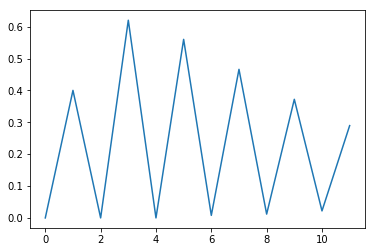

In [69]:
ten_time['平均费时'].plot()
ten_time

## 预警模型

In [66]:
num_list = [5, 50, 100, 500,
            1000, 2000, 
            #5000, 10000
           ]
num_time = []

for num in num_list:
    data = {"record":cbirc_data.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')}
    sum_len = cbirc_data.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 1])  
    
    data = {"record":cbirc_data_desc.iloc[:num,[0, 1, 2]].to_dict(orient = 'records')} 
    sum_len = cbirc_data_desc.iloc[:num, 4].sum(axis = 0)
    n = cbirc_data_desc.iloc[:num,[0, 1, 2]].shape[0]
    result = requests.post(url_warn, data = json.dumps(data),
                           headers=headers, allow_redirects=True)
    json_data = json.loads(result.text)
    elapsed_time = json_data['elapsed_time']
    print('处理 %s 条数据, 文本总长度：%s，文本平均长度：%s，总共费时：%s s，平均费时：%0.4f'%(n, 
                                                                sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n))
    num_time.append([n, sum_len, sum_len/n, elapsed_time, float(elapsed_time)/n, 2])    

warn_time = pd.DataFrame(num_time, columns = ['处理数据量' ,'文本总长度','文本平均长度',
                                             '总共费时','平均费时','flag'])
parse_data = json_data['docs'][:2]
parse_data

处理 5 条数据, 文本总长度：56，文本平均长度：11.2，总共费时：0.00 s，平均费时：0.0000
处理 5 条数据, 文本总长度：49831，文本平均长度：9966.2，总共费时：0.00 s，平均费时：0.0000
处理 50 条数据, 文本总长度：777，文本平均长度：15.54，总共费时：0.00 s，平均费时：0.0000
处理 50 条数据, 文本总长度：487518，文本平均长度：9750.36，总共费时：6.00 s，平均费时：0.1200
处理 100 条数据, 文本总长度：2072，文本平均长度：20.72，总共费时：0.00 s，平均费时：0.0000
处理 100 条数据, 文本总长度：948385，文本平均长度：9483.85，总共费时：12.00 s，平均费时：0.1200
处理 500 条数据, 文本总长度：32805，文本平均长度：65.61，总共费时：0.00 s，平均费时：0.0000
处理 500 条数据, 文本总长度：3911680，文本平均长度：7823.36，总共费时：51.00 s，平均费时：0.1020
处理 1000 条数据, 文本总长度：134389，文本平均长度：134.389，总共费时：1.00 s，平均费时：0.0010
处理 1000 条数据, 文本总长度：6614428，文本平均长度：6614.428，总共费时：86.00 s，平均费时：0.0860
处理 2000 条数据, 文本总长度：639639，文本平均长度：319.8195，总共费时：6.00 s，平均费时：0.0030
处理 2000 条数据, 文本总长度：10490266，文本平均长度：5245.133，总共费时：121.00 s，平均费时：0.0605


[{'id': 46136176, 'warning': 0}, {'id': 46134901, 'warning': 0}]

,处理数据量,文本总长度,文本平均长度,总共费时,平均费时
0,5,56,11.2000,0.00,0.0000
1,5,49831,9966.2000,0.00,0.0000
2,50,777,15.5400,0.00,0.0000
3,50,487518,9750.3600,6.00,0.1200
4,100,2072,20.7200,0.00,0.0000
5,100,948385,9483.8500,12.00,0.1200
6,500,32805,65.6100,0.00,0.0000
7,500,3911680,7823.3600,51.00,0.1020
8,1000,134389,134.3890,1.00,0.0010
9,1000,6614428,6614.4280,86.00,0.0860


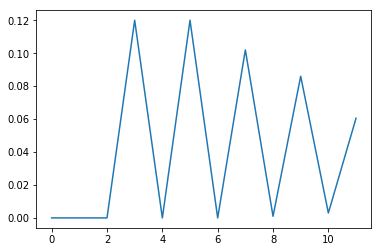

In [68]:
warn_time['平均费时'].plot()
warn_time

## 抽取机构及计算值

In [12]:
from toolkits.setup.specific_func import get_engine,set_ch_pd
set_ch_pd()

In [14]:
engine = get_engine('cbirc')

In [23]:
# 数据
sql_cbirc = '''
SELECT 
    t1.type, t2.id, t2.title, t3.text AS content, t2.publishtime
FROM
    cbrc_circ.db_docinfo_trade t1
        LEFT JOIN
    cbrc_circ.db_docinfo t2 ON t1.urlhash = t2.urlhash
        LEFT JOIN
    cbrc_circ.db_docinfo_text t3 ON t3.urlhash = t2.urlhash
WHERE
    t1.type = 4 and t2.publishtime > '2018-09-13 18:00:00'
limit 3000
'''

cbirc_data = pd.read_sql(sql_cbirc, engine)
print(cbirc_data.shape)
cbirc_data.head()

(901, 5)


,type,id,title,content,publishtime
0,4,83290460,两汉发祥地 合作再升级丨中青旅与徐州市政府签署战略合作协议,9月12日，“落实习总书记重要指示精神 推动徐州高质量发展恳谈会”在北京中国大饭店隆重举办。会上，中青旅控股股份有限公司与江苏省徐州市人民政府签署战略合作协议。 \n\n \n\n 中国光大银行股份有限公司董事师永彦，中青旅控股党委书记、董事长康国明，中青旅控股副总裁、中青博联董事长袁浩出席签约仪式。第十一届全国政协副主席李金华，江苏省人民政府副省长王江，国家发改委副秘书长周晓飞，徐州市委书记周铁根等领导出席，见证双方签约。 \n\n \n\n 根据协议，中青旅将携手徐州市人民政府，依托各自资源、品牌、产业经验等方面的优势，深挖徐州区域特色资源，助力徐州在文旅、会展、体育、健康等产业领域发展及相关资源的开发。 \n\n 文旅产业 作为现代服务业的一部分，与区域经济发展、区域旅游资源关系密切 。作为两汉文明的发祥地，徐州拥有大量文化遗产、名胜古迹和深厚的历史底蕴，被称作“东方雅典”。徐州的发展取得了巨大成就，徐州市委市政府正在按照国家要求大力促进产业转型，文旅产业是其中很重要的方向。 \n \n \n 根据协议，中青旅将携手徐州市人民政府，依托各自资源、品牌、产业经验等方面的优势，深挖徐州区域特色资源，助力徐州在文旅、会展、体育、健康等产业领域发展及相关资源的开发。 \n \n\n 文旅产业 作为现代服务业的一部分，与区域经济发展、区域旅游资源关系密切 。作为两汉文明的发祥地，徐州拥有大量文化遗产、名胜古迹和深厚的历史底蕴，被称作“东方雅典”。徐州的发展取得了巨大成就，徐州市委市政府正在按照国家要求大力促进产业转型，文旅产业是其中很重要的方向。 \n \n\n 近年来， 中青旅充分发挥资源与团队优势，助推文旅综合体开发与建设业务发展。 中青旅旗下整合营销服务企业中青博联于今年7月与江苏省徐州市云龙区政府签署户部山历史文化街区综合运营管理项目合作协议，中青旅博汇公司将作为运营主体，整合多元化资源，运用专业力量，全面升级户部山历史文化街区的整体氛围和服务体验。 \n \n\n \n \n\n ▲ 7月22日 中青博联与云龙区政府 签约 户部山项目 \n \n\n 此次签约， 标志着中青旅与徐州市的合作迈入一个更全面且更高层次的阶段，为双方深入广泛合作夯实基础。未来，中青旅将在光大集团...,2018-09-13 18:01:00
1,4,83304698,银行理财余额下降、人均存款不足5万，大家把钱都投哪儿了？,随着《关于规范金融机构资产管理业务的指导意见》(下称《资管新规》)的实施，银行理财正在受到全方位的冲击和影响。\n\n第一财经记者梳理各银行半年报发现，2018年上半年，银行理财几近全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了负增长时代。\n\n普益标准分析师于康认为，银行理财产品余额下降趋势或将持续一段时间。从产品发行角度来讲，保本理财产品将退出历史舞台，净值型产品处于转型过渡期，市场接受程度有待验证，银行发行新产品态度谨慎；从产品收益角度考虑，伴随老产品所投非标的陆续到期，在理财新规对非标投资的限制下，银行理财产品收益优势弱化，产品余额也将逐步缩减。\n\n 负增长时代？ \n\n银保监会一则数据显示，2018年5月末银行理财产品余额为22.28万亿元，而6月末余额为21万亿元，同业理财规模和占比持续下降。\n\n这一现象也反映在各大银行半年报上。第一财经记者在统计的19家银行中，与去年底相比，11家银行理财产品余额出现负增长，其中，建设银行下降6.5%，光大银行下降12%，杭州银行则减少了11.8%，北京银行理财余额下降10%，宁波银行下降7.6%，浙商银行下降10%，广州农商银行理财产品余额更是下降高达22%，浦发银行理财余额也下降了20%。\n \n\n \n（数据来源：第一财经根据Wind资讯、上市银行年报整理）\n\n建设银行2018年半年报显示，上半年，该行自主发行理财产品6492期，发行额37223.93亿元，6月末理财产品余额19486.26亿元，较去年年底下降了6.5%。其中，非保本理财产品余额15990.92亿元，保本理财产品余额3495.34亿元。\n\n同期，招商银行上半年实现理财产品销售额7.14万亿元，同比下降4.42%。报告期末，该行理财产品余额（不含结构性存款）1.80万亿元，同口径较上年末下降4.00%。招商银行认为，资管新规正式实施，银行资产管理业务在资管新规过渡期内将有序压降不合规理财产品规模，停止不合规资产投放，对过渡期内难以消化的存量资产进行处置安排，同时，客户对净值型产品的接受程度也需要一定时间培育，这将在短期内对各家银行资产管理业务的转型发展和收入增长带来很大的挑战。\n\n理财产品规模下降，直接冲击着...,2018-09-13 18:01:00
2,4,83304715,银行理财余额下降、人均存款不足5万，大家把钱都投哪儿了？,随着《关于规范金融机构资产管理业务的指导意见》(下称《资管新规》)的实施，银行理财正在受到全方位的冲击和影响。\n\n第一财经记者梳理各银行半年报发现，2018年上半年，银行理财几近全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了负增长时代。\n\n普益标准分析师于康认为，银行理财产品余额下降趋势或将持续一段时间。从产品发行角度来讲，保本理财产品将退出历史舞台，净值型产品处于转型过渡期，市场接受程度有待验证，银行发行新产品态度谨慎；从产品收益角度考虑，伴随老产品所投非标的陆续到期，在理财新规对非标投资的限制下，银行理财产品收益优势弱化，产品余额也将逐步缩减。\n\n 负增长时代？ \n\n银保监会一则数据显示，2018年5月末银行理财产品余额为22.28万亿元，而6月末余额为21万亿元，同业理财规模和占比持续下降。\n\n这一现象也反映在各大银行半年报上。第一财经记者在统计的19家银行中，与去年底相比，11家银行理财产品余额出现负增长，其中，建设银行下降6.5%，光大银行下降12%，杭州银行则减少了11.8%，北京银行理财余额下降10%，宁波银行下降7.6%，浙商银行下降10%，广州农商银行理财产品余额更是下降高达22%，浦发银行理财余额也下降了20%。\n \n\n \n（数据来源：第一财经根据Wind资讯、上市银行年报整理）\n\n建设银行2018年半年报显示，上半年，该行自主发行理财产品6492期，发行额37223.93亿元，6月末理财产品余额19486.26亿元，较去年年底下降了6.5%。其中，非保本理财产品余额15990.92亿元，保本理财产品余额3495.34亿元。\n\n同期，招商银行上半年实现理财产品销售额7.14万亿元，同比下降4.42%。报告期末，该行理财产品余额（不含结构性存款）1.80万亿元，同口径较上年末下降4.00%。招商银行认为，资管新规正式实施，银行资产管理业务在资管新规过渡期内将有序压降不合规理财产品规模，停止不合规资产投放，对过渡期内难以消化的存量资产进行处置安排，同时，客户对净值型产品的接受程度也需要一定时间培育，这将在短期内对各家银行资产管理业务的转型发展和收入增长带来很大的挑战。\n\n理财产品规模下降，直接冲击着...,2018-09-13 18:01:00
3,4,83304716,银行理财余额下降、人均存款不足5万，大家把钱都投哪儿了？,随着《关于规范金融机构资产管理业务的指导意见》(下称《资管新规》)的实施，银行理财正在受到全方位的冲击和影响。\n\n第一财经记者梳理各银行半年报发现，2018年上半年，银行理财几近全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了负增长时代。\n\n普益标准分析师于康认为，银行理财产品余额下降趋势或将持续一段时间。从产品发行角度来讲，保本理财产品将退出历史舞台，净值型产品处于转型过渡期，市场接受程度有待验证，银行发行新产品态度谨慎；从产品收益角度考虑，伴随老产品所投非标的陆续到期，在理财新规对非标投资的限制下，银行理财产品收益优势弱化，产品余额也将逐步缩减。\n\n 负增长时代？ \n\n银保监会一则数据显示，2018年5月末银行理财产品余额为22.28万亿元，而6月末余额为21万亿元，同业理财规模和占比持续下降。\n\n这一现象也反映在各大银行半年报上。第一财经记者在统计的19家银行中，与去年底相比，11家银行理财产品余额出现负增长，其中，建设银行下降6.5%，光大银行下降12%，杭州银行则减少了11.8%，北京银行理财余额下降10%，宁波银行下降7.6%，浙商银行下降10%，广州农商银行理财产品余额更是下降高达22%，浦发银行理财余额也下降了20%。\n \n\n \n（数据来源：第一财经根据Wind资讯、上市银行年报整理）\n\n建设银行2018年半年报显示，上半年，该行自主发行理财产品6492期，发行额37223.93亿元，6月末理财产品余额19486.26亿元，较去年年底下降了6.5%。其中，非保本理财产品余额15990.92亿元，保本理财产品余额3495.34亿元。\n\n同期，招商银行上半年实现理财产品销售额7.14万

In [7]:
# data = {"record":cbirc_data.iloc[:,[0, 1, 2]].to_dict(orient = 'records'),
#        "types": 1}
# with open("./test.json",'w',encoding='utf-8') as json_file:
#         json.dump(data,json_file,ensure_ascii=False) 

In [60]:
ip_port = '192.168.0.104:8100'

headers={'content-type':'application/json'}
url_cor = "http://%s/extract_abstract_i"%ip_port
data = {"record":cbirc_data.iloc[:,[1, 2, 3]].to_dict(orient = 'records'),
       "types": 1}

result = requests.post(url_cor, data = json.dumps(data),
                       headers=headers, allow_redirects=True)
json_data = json.loads(result.text)
cor_elapsed_time = json_data['elapsed_time']
cor_elapsed_time

'203.00'

In [59]:
pred_res_1 = [[record['id'], record['vip_word'], 
             record['key_sentence'], record['purity']] for record in json_data['docs']]
pred_res_1 = pd.DataFrame(pred_res_1, columns = ['id', 'vip_word', 'key_sentence', 'purity'])

pred_res_2 = []
org_score = [[record['id'], record['org_score_list']] for record in json_data['docs']]
for [id, org_score_dict] in org_score:
    if org_score_dict:
        
        tmp_list = []
        for key,value in zip(org_score_dict.keys(), org_score_dict.values()):
            tmp_list += [key, value[0], value[1]]
#         print('---  ', org_score_dict)
#         print(tmp_list)
        pred_res_2.append([id] + tmp_list)    
    else :
        pred_res_2.append([id])
pred_res_2 = pd.DataFrame(pred_res_2, columns = ['id', 'org_1', 'score_1', 'org_1_lab', 
                                                 'org_2', 'score_2', 'org_2_lab', 
                                                 'org_3', 'score_3', 'org_3_lab'])
pred_res =  pd.merge(pred_res_1, pred_res_2, on = 'id')
pred_res.head()

,id,vip_word,key_sentence,purity,org_1,score_1,org_1_lab,org_2,score_2,org_2_lab,org_3,score_3,org_3_lab
0,83290460,,,0,None,nan,None,None,nan,None,None,nan,None
1,83304698,建设银行,全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数,12,建设银行,60.000,old,招商银行,60.000,old,浙商银行,50.000,old
2,83304715,建设银行,全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数,12,建设银行,60.000,old,招商银行,60.000,old,浙商银行,50.000,old
3,83304716,建设银行,全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数,12,建设银行,60.000,old,招商银行,60.000,old,浙商银行,50.000,old
4,83290093,民生银行,值得一提的是，其曾一度大幅持有民生银行股份，并且成功进入了该行董事会，但此后又逐渐减持且退出董事会,7,中融国际信托,50.000,old,民生银行,80.000,old,金融租赁公司,50.000,old


In [36]:
pred_res =  pd.merge(pred_res, cbirc_data, on = 'id')
pred_res['key_sentence_len'] = pred_res['key_sentence'].apply(lambda x:len(x))
pred_res['content_len'] = pred_res['content'].apply(lambda x:len(str(x)))
pred_res.head()

,id,vip_word,key_sentence,purity,org_1,score_1,org_1_lab,org_2,score_2,org_2_lab,org_3,score_3,org_3_lab,type,title,content,publishtime,key_sentence_len,content_len
0,83290460,,,0,None,nan,None,None,nan,None,None,nan,None,4,两汉发祥地 合作再升级丨中青旅与徐州市政府签署战略合作协议,9月12日，“落实习总书记重要指示精神 推动徐州高质量发展恳谈会”在北京中国大饭店隆重举办。会上，中青旅控股股份有限公司与江苏省徐州市人民政府签署战略合作协议。 \n\n \n\n 中国光大银行股份有限公司董事师永彦，中青旅控股党委书记、董事长康国明，中青旅控股副总裁、中青博联董事长袁浩出席签约仪式。第十一届全国政协副主席李金华，江苏省人民政府副省长王江，国家发改委副秘书长周晓飞，徐州市委书记周铁根等领导出席，见证双方签约。 \n\n \n\n 根据协议，中青旅将携手徐州市人民政府，依托各自资源、品牌、产业经验等方面的优势，深挖徐州区域特色资源，助力徐州在文旅、会展、体育、健康等产业领域发展及相关资源的开发。 \n\n 文旅产业 作为现代服务业的一部分，与区域经济发展、区域旅游资源关系密切 。作为两汉文明的发祥地，徐州拥有大量文化遗产、名胜古迹和深厚的历史底蕴，被称作“东方雅典”。徐州的发展取得了巨大成就，徐州市委市政府正在按照国家要求大力促进产业转型，文旅产业是其中很重要的方向。 \n \n \n 根据协议，中青旅将携手徐州市人民政府，依托各自资源、品牌、产业经验等方面的优势，深挖徐州区域特色资源，助力徐州在文旅、会展、体育、健康等产业领域发展及相关资源的开发。 \n \n\n 文旅产业 作为现代服务业的一部分，与区域经济发展、区域旅游资源关系密切 。作为两汉文明的发祥地，徐州拥有大量文化遗产、名胜古迹和深厚的历史底蕴，被称作“东方雅典”。徐州的发展取得了巨大成就，徐州市委市政府正在按照国家要求大力促进产业转型，文旅产业是其中很重要的方向。 \n \n\n 近年来， 中青旅充分发挥资源与团队优势，助推文旅综合体开发与建设业务发展。 中青旅旗下整合营销服务企业中青博联于今年7月与江苏省徐州市云龙区政府签署户部山历史文化街区综合运营管理项目合作协议，中青旅博汇公司将作为运营主体，整合多元化资源，运用专业力量，全面升级户部山历史文化街区的整体氛围和服务体验。 \n \n\n \n \n\n ▲ 7月22日 中青博联与云龙区政府 签约 户部山项目 \n \n\n 此次签约， 标志着中青旅与徐州市的合作迈入一个更全面且更高层次的阶段，为双方深入广泛合作夯实基础。未来，中青旅将在光大集团...,2018-09-13 18:01:00,0,1097
1,83304698,招商银行,”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了,12,招商银行,60.000,old,建设银行,60.000,old,浙商银行,50.000,old,4,银行理财余额下降、人均存款不足5万，大家把钱都投哪儿了？,随着《关于规范金融机构资产管理业务的指导意见》(下称《资管新规》)的实施，银行理财正在受到全方位的冲击和影响。\n\n第一财经记者梳理各银行半年报发现，2018年上半年，银行理财几近全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了负增长时代。\n\n普益标准分析师于康认为，银行理财产品余额下降趋势或将持续一段时间。从产品发行角度来讲，保本理财产品将退出历史舞台，净值型产品处于转型过渡期，市场接受程度有待验证，银行发行新产品态度谨慎；从产品收益角度考虑，伴随老产品所投非标的陆续到期，在理财新规对非标投资的限制下，银行理财产品收益优势弱化，产品余额也将逐步缩减。\n\n 负增长时代？ \n\n银保监会一则数据显示，2018年5月末银行理财产品余额为22.28万亿元，而6月末余额为21万亿元，同业理财规模和占比持续下降。\n\n这一现象也反映在各大银行半年报上。第一财经记者在统计的19家银行中，与去年底相比，11家银行理财产品余额出现负增长，其中，建设银行下降6.5%，光大银行下降12%，杭州银行则减少了11.8%，北京银行理财余额下降10%，宁波银行下降7.6%，浙商银行下降10%，广州农商银行理财产品余额更是下降高达22%，浦发银行理财余额也下降了20%。\n \n\n \n（数据来源：第一财经根据Wind资讯、上市银行年报整理）\n\n建设银行2018年半年报显示，上半年，该行自主发行理财产品6492期，发行额37223.93亿元，6月末理财产品余额19486.26亿元，较去年年底下降了6.5%。其中，非保本理财产品余额15990.92亿元，保本理财产品余额3495.34亿元。\n\n同期，招商银行上半年实现理财产品销售额7.14万亿元，同比下降4.42%。报告期末，该行理财产品余额（不含结构性存款）1.80万亿元，同口径较上年末下降4.00%。招商银行认为，资管新规正式实施，银行资产管理业务在资管新规过渡期内将有序压降不合规理财产品规模，停止不合规资产投放，对过渡期内难以消化的存量资产进行处置安排，同时，客户对净值型产品的接受程度也需要一定时间培育，这将在短期内对各家银行资产管理业务的转型发展和收入增长带来很大的挑战。\n\n理财产品规模下降，直接冲击着...,2018-09-13 18:01:00,70,2847
2,83304715,招商银行,”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了,12,招商银行,60.000,old,建设银行,60.000,old,浙商银行,50.000,old,4,银行理财余额下降、人均存款不足5万，大家把钱都投哪儿了？,随着《关于规范金融机构资产管理业务的指导意见》(下称《资管新规》)的实施，银行理财正在受到全方位的冲击和影响。\n\n第一财经记者梳理各银行半年报发现，2018年上半年，银行理财几近全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了负增长时代。\n\n普益标准分析师于康认为，银行理财产品余额下降趋势或将持续一段时间。从产品发行角度来讲，保本理财产品将退出历史舞台，净值型产品处于转型过渡期，市场接受程度有待验证，银行发行新产品态度谨慎；从产品收益角度考虑，伴随老产品所投非标的陆续到期，在理财新规对非标投资的限制下，银行理财产品收益优势弱化，产品余额也将逐步缩减。\n\n 负增长时代？ \n\n银保监会一则数据显示，2018年5月末银行理财产品余额为22.28万亿元，而6月末余额为21万亿元，同业理财规模和占比持续下降。\n\n这一现象也反映在各大银行半年报上。第一财经记者在统计的19家银行中，与去年底相比，11家银行理财产品余额出现负增长，其中，建设银行下降6.5%，光大银行下降12%，杭州银行则减少了11.8%，北京银行理财余额下降10%，宁波银行下降7.6%，浙商银行下降10%，广州农商银行理财产品余额更是下降高达22%，浦发银行理财余额也下降了20%。\n \n\n \n（数据来源：第一财经根据Wind资讯、上市银行年报整理）\n\n建设银行2018年半年报显示，上半年，该行自主发行理财产品6492期，发行额37223.93亿元，6月末理财产品余额19486.26亿元，较去年年底下降了6.5%。其中，非保本理财产品余额15990.92亿元，保本理财产品余额3495.34亿元。\n\n同期，招商银行上半年实现理财产品销售额7.14万亿元，同比下降4.42%。报告期末，该行理财产品余额（不含结构性存款）1.80万亿元，同口径较上年末下降4.00%。招商银行认为，资管新规正式实施，银行资产管理业务在资管新规过渡期内将有序压降不合规理财产品规模，停止不合规资产投放，对过渡期内难以消化的存量资产进行处置安排，同时，客户对净值型产品的接受程度也需要一定时间培育，这将在短期内对各家银行资产管理业务的转型发展和收入增长带来很大的挑战。\n\n理财产品规模下降，直接冲击着...,2018-09-13 18:01:00,70,2847
3,83304716,招商银行,”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了,12,招商银行,60.000,old,建设银行,60.000,old,浙商银行,50.000,old,4,银行理财余额下降、人均存款不足5万，大家把钱都投哪儿了？,随着《关于规范金融机构资产管理业务的指导意见》(下称《资管新规》)的实施，银行理财正在受到全方位的冲击和影响。\n\n第一财经记者梳理各银行半年报发现，2018年上半年，银行理财几近全线“缩表”，除了工商银行、民生银行、平安银行等4家银行外，建设银行、招商银行、兴业银行、光大银行、北京银行、广州农商银行、浙商银行等大多数银行迈进了负增长时代。\n\n普益标准分析师于康认为，银行理财产品余额下降趋

In [37]:
pred_res.describe()

,id,purity,score_1,score_2,score_3,type,key_sentence_len,content_len
count,901.000,901.000,833.000,572.000,440.000,901.000,901.000,901.000
mean,83324777.070,59.032,134.022,43.042,31.568,4.000,54.453,6153.048
std,451166.800,35.066,315.200,46.271,32.518,0.000,24.486,8697.505
min,77343257.000,0.000,10.000,10.000,10.000,4.000,0.000,54.000
25%,83343671.000,28.000,30.000,10.000,10.000,4.000,41.000,1138.000
50%,83371767.000,62.000,60.000,30.000,20.000,4.000,61.000,2737.000
75%,83400079.000,100.000,130.000,60.000,40.000,4.000,70.000,6228.000
max,83435197.000,100.000,4600.000,370.000,240.000,4.000,100.000,51856.000


In [38]:
pred_res.to_excel('extract_abstract_res_2.xlsx', index = False)

In [2]:
pred_res = pd.read_excel('extract_abstract_res.xlsx')

In [13]:
pred_res.describe()

,id,score_1,score_2,score_3,type,key_sentence_len,content_len
count,17003.000,15282.000,9475.000,7248.000,17003.000,17003.000,17003.000
mean,82767929.722,86.645,43.008,28.510,4.000,356.780,3324.392
std,289050.999,138.232,45.775,33.184,0.000,2451.611,4681.195
min,77343257.000,0.000,0.000,0.000,4.000,0.000,3.000
25%,82533300.500,20.000,10.000,10.000,4.000,31.000,1161.000
50%,82728616.000,40.000,30.000,20.000,4.000,72.000,2015.000
75%,83009225.500,110.000,60.000,30.000,4.000,139.000,3323.000
max,83272948.000,4600.000,550.000,540.000,4.000,53019.000,59427.000


In [11]:
for num in [200,250,300,350,400]:
    print('---------- num: ', num)
    print(pred_res[pred_res['score_1'] > num].shape[0] , pred_res[pred_res['score_1'] > num].shape[0]/pred_res.shape[0])
    print(pred_res[pred_res['score_2'] > num].shape[0] , pred_res[pred_res['score_2'] > num].shape[0]/pred_res.shape[0])
    print(pred_res[pred_res['score_3'] > num].shape[0] , pred_res[pred_res['score_3'] > num].shape[0]/pred_res.shape[0])

---------- num:  200
1629 0.09580662236075986
120 0.007057578074457449
29 0.0017055813679938835
---------- num:  250
942 0.05540198788449097
68 0.003999294242192555
21 0.0012350761630300535
---------- num:  300
562 0.03305299064870905
27 0.001587955066752926
17 0.0009998235605481387
---------- num:  350
415 0.024407457507498675
15 0.0008821972593071811
9 0.0005293183555843086
---------- num:  400
325 0.01911427395165559
13 0.0007645709580662236
3 0.00017643945186143623
